In [18]:
import numpy as np
# import core_rec as cs
import TCR as cs

import vish_graphs as vg
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import random
import os


In [19]:
# Generate random graph
file_path = vg.generate_random_graph(50, seed=23)
adj_matrix = np.loadtxt(file_path, delimiter=",")

file_path2 = vg.generate_weight_matrix(50,weight_range=(7,89), seed=23)
weight_matrix = np.loadtxt(file_path2, delimiter=",")
col=[]
for i in range(50):
    col.append(i)

node_labels = {i: label for i, label in enumerate(col)}



Generating graph: 100%|██████████| 50/50 [00:00<00:00, 14037.16it/s]


In [20]:

    # Convert adjacency matrix to dataset
graph_dataset = cs.GraphDataset(adj_matrix)
# graph_dataset = cs.GraphDataset(adj_matrix, weight_matrix)  # Include weight matrix
data_loader = DataLoader(graph_dataset, batch_size=5, shuffle=True)

    # Define model parameters
num_layers = 2
d_model = 128
num_heads = 8
d_feedforward = 512
input_dim = len(adj_matrix[0])

  

In [21]:
  # Initialize model, loss function, and optimizer
model = cs.GraphTransformer(num_layers, d_model, num_heads, d_feedforward, input_dim)
# model = cs.GraphTransformer(num_layers, d_model, num_heads, d_feedforward, input_dim, use_weights=True)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
top_nodes = vg.find_top_nodes(adj_matrix, num_nodes=5)


The top 5 nodes with the greatest number of strong correlations are: [18, 19, 31, 8, 9]


In [22]:

    # Train the model
num_epochs = 10
cs.train_model(model, data_loader, criterion, optimizer, num_epochs)


    # Predict recommendations for a specific node
node_index = 2   #target node
recommended_nodes = cs.predict(model, adj_matrix, node_index, top_k=5, threshold=0.5)
print(f"Recommended nodes for node {node_index}: {recommended_nodes}")




Epoch 1/10, Loss: 0.3308
Epoch 2/10, Loss: 0.1994
Epoch 3/10, Loss: 0.1778
Epoch 4/10, Loss: 0.1458
Epoch 5/10, Loss: 0.1262
Epoch 6/10, Loss: 0.1066
Epoch 7/10, Loss: 0.0879
Epoch 8/10, Loss: 0.0716
Epoch 9/10, Loss: 0.0609
Epoch 10/10, Loss: 0.0589
Recommended nodes for node 2: [29 42 10 38 40]


In [23]:
    # Draw the graph in 3D
# vg.draw_graph_3d(adj_matrix, top_nodes, recommended_nodes,transparent_labeled=False,edge_weights=weight_matrix,node_labels=node_labels)



In [24]:
# print(jaccard)
aaj,aaj2 = cs.aaj_accuracy(adj_matrix,node_index,recommended_nodes)
print("Average Jaccard Score:",aaj)
print("Average Adam/Adar Score:",aaj2)

def test_scores_for_different_seeds(seeds, node_index=2, num_nodes=50, top_k=5, num_epochs=100):
    jaccard_scores = []
    adamic_adar_scores = []

    for seed in seeds:
        # Generate random graph
        file_path = vg.generate_random_graph(num_nodes, seed=seed)
        adj_matrix = np.loadtxt(file_path, delimiter=",")

        # Convert adjacency matrix to dataset
        graph_dataset = cs.GraphDataset(adj_matrix)
        data_loader = DataLoader(graph_dataset, batch_size=5, shuffle=True)

        # Define model parameters
        num_layers = 2
        d_model = 128
        num_heads = 8
        d_feedforward = 512
        input_dim = len(adj_matrix[0])

        # Initialize model, loss function, and optimizer
        model = cs.GraphTransformer(num_layers, d_model, num_heads, d_feedforward, input_dim)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        # Train the model
        cs.train_model(model, data_loader, criterion, optimizer, num_epochs)

        # Predict recommendations for a specific node
        recommended_nodes = cs.predict(model, adj_matrix, node_index, top_k=top_k)

        # Calculate scores
        aaj, aaj2 = cs.aaj_accuracy(adj_matrix, node_index, recommended_nodes)
        jaccard_scores.append(aaj)
        adamic_adar_scores.append(aaj2)

    return jaccard_scores, adamic_adar_scores


Average Jaccard Score: 0.2376245210727969
Average Adam/Adar Score: 2.4883935588430175


In [25]:
# Generate 500 unique random seeds
seeds = random.sample(range(10000), 10)   # Example seeds: 10, 20, 30, 40, 50
# seeds = (10,102,241,234,123,324)   # Example seeds: 10, 20, 30, 40, 50


# Test scores
jaccard_scores, adamic_adar_scores = test_scores_for_different_seeds(seeds)


Generating graph: 100%|██████████| 50/50 [00:00<00:00, 125577.96it/s]

Epoch 1/100, Loss: 0.3596
Epoch 2/100, Loss: 0.2087
Epoch 3/100, Loss: 0.1862
Epoch 4/100, Loss: 0.1715


Epoch 5/100, Loss: 0.1436
Epoch 6/100, Loss: 0.1196
Epoch 7/100, Loss: 0.1036
Epoch 8/100, Loss: 0.0857
Epoch 9/100, Loss: 0.0705
Epoch 10/100, Loss: 0.0580
Epoch 11/100, Loss: 0.0496
Epoch 12/100, Loss: 0.0448
Epoch 13/100, Loss: 0.0380
Epoch 14/100, Loss: 0.0334
Epoch 15/100, Loss: 0.0300
Epoch 16/100, Loss: 0.0281
Epoch 17/100, Loss: 0.0264
Epoch 18/100, Loss: 0.0242
Epoch 19/100, Loss: 0.0228
Epoch 20/100, Loss: 0.0211
Epoch 21/100, Loss: 0.0223
Epoch 22/100, Loss: 0.0220
Epoch 23/100, Loss: 0.0198
Epoch 24/100, Loss: 0.0201
Epoch 25/100, Loss: 0.0190
Epoch 26/100, Loss: 0.0175
Epoch 27/100, Loss: 0.0166
Epoch 28/100, Loss: 0.0164
Epoch 29/100, Loss: 0.0172
Epoch 30/100, Loss: 0.0144
Epoch 31/100, Loss: 0.0137
Epoch 32/100, Loss: 0.0136
Epoch 33/100, Loss: 0.0133
Epoch 34/100, Loss: 0.0128
Epoch 35/100, Loss: 0.0119
Epoch 36/100, Loss: 0.0112
Epoch 37/100, Loss: 0.0114
Epoch 38/100, Loss: 0.0109
Epoch 39/100, Loss: 0.0104
Epoch 40/100, Loss: 0.0105
Epoch 41/100, Loss: 0.0109
Epoch 

Generating graph: 100%|██████████| 50/50 [00:00<00:00, 119021.11it/s]

Epoch 1/100, Loss: 0.3367
Epoch 2/100, Loss: 0.1977
Epoch 3/100, Loss: 0.1866
Epoch 4/100, Loss: 0.1689


Epoch 5/100, Loss: 0.1444
Epoch 6/100, Loss: 0.1237
Epoch 7/100, Loss: 0.1027
Epoch 8/100, Loss: 0.0835
Epoch 9/100, Loss: 0.0705
Epoch 10/100, Loss: 0.0631
Epoch 11/100, Loss: 0.0503
Epoch 12/100, Loss: 0.0454
Epoch 13/100, Loss: 0.0395
Epoch 14/100, Loss: 0.0363
Epoch 15/100, Loss: 0.0323
Epoch 16/100, Loss: 0.0295
Epoch 17/100, Loss: 0.0264
Epoch 18/100, Loss: 0.0260
Epoch 19/100, Loss: 0.0236
Epoch 20/100, Loss: 0.0225
Epoch 21/100, Loss: 0.0225
Epoch 22/100, Loss: 0.0202
Epoch 23/100, Loss: 0.0202
Epoch 24/100, Loss: 0.0186
Epoch 25/100, Loss: 0.0173
Epoch 26/100, Loss: 0.0171
Epoch 27/100, Loss: 0.0160
Epoch 28/100, Loss: 0.0165
Epoch 29/100, Loss: 0.0177
Epoch 30/100, Loss: 0.0149
Epoch 31/100, Loss: 0.0158
Epoch 32/100, Loss: 0.0151
Epoch 33/100, Loss: 0.0139
Epoch 34/100, Loss: 0.0137
Epoch 35/100, Loss: 0.0133
Epoch 36/100, Loss: 0.0138
Epoch 37/100, Loss: 0.0134
Epoch 38/100, Loss: 0.0123
Epoch 39/100, Loss: 0.0117
Epoch 40/100, Loss: 0.0117
Epoch 41/100, Loss: 0.0110
Epoch 

Generating graph: 100%|██████████| 50/50 [00:00<00:00, 105916.77it/s]

Epoch 1/100, Loss: 0.3189
Epoch 2/100, Loss: 0.1827
Epoch 3/100, Loss: 0.1686
Epoch 4/100, Loss: 0.1477


Epoch 5/100, Loss: 0.1172
Epoch 6/100, Loss: 0.1041
Epoch 7/100, Loss: 0.0822
Epoch 8/100, Loss: 0.0712
Epoch 9/100, Loss: 0.0624
Epoch 10/100, Loss: 0.0519
Epoch 11/100, Loss: 0.0519
Epoch 12/100, Loss: 0.0465
Epoch 13/100, Loss: 0.0395
Epoch 14/100, Loss: 0.0354
Epoch 15/100, Loss: 0.0298
Epoch 16/100, Loss: 0.0276
Epoch 17/100, Loss: 0.0265
Epoch 18/100, Loss: 0.0256
Epoch 19/100, Loss: 0.0228
Epoch 20/100, Loss: 0.0215
Epoch 21/100, Loss: 0.0206
Epoch 22/100, Loss: 0.0192
Epoch 23/100, Loss: 0.0164
Epoch 24/100, Loss: 0.0177
Epoch 25/100, Loss: 0.0187
Epoch 26/100, Loss: 0.0157
Epoch 27/100, Loss: 0.0156
Epoch 28/100, Loss: 0.0151
Epoch 29/100, Loss: 0.0150
Epoch 30/100, Loss: 0.0143
Epoch 31/100, Loss: 0.0144
Epoch 32/100, Loss: 0.0129
Epoch 33/100, Loss: 0.0146
Epoch 34/100, Loss: 0.0136
Epoch 35/100, Loss: 0.0125
Epoch 36/100, Loss: 0.0118
Epoch 37/100, Loss: 0.0114
Epoch 38/100, Loss: 0.0111
Epoch 39/100, Loss: 0.0114
Epoch 40/100, Loss: 0.0103
Epoch 41/100, Loss: 0.0108
Epoch 

Generating graph: 100%|██████████| 50/50 [00:00<00:00, 125577.96it/s]

Epoch 1/100, Loss: 0.3366
Epoch 2/100, Loss: 0.1958
Epoch 3/100, Loss: 0.1786
Epoch 4/100, Loss: 0.1509
Epoch 5/100, Loss: 0.1241


Epoch 6/100, Loss: 0.1095
Epoch 7/100, Loss: 0.0919
Epoch 8/100, Loss: 0.0729
Epoch 9/100, Loss: 0.0622
Epoch 10/100, Loss: 0.0531
Epoch 11/100, Loss: 0.0433
Epoch 12/100, Loss: 0.0371
Epoch 13/100, Loss: 0.0345
Epoch 14/100, Loss: 0.0327
Epoch 15/100, Loss: 0.0294
Epoch 16/100, Loss: 0.0273
Epoch 17/100, Loss: 0.0249
Epoch 18/100, Loss: 0.0231
Epoch 19/100, Loss: 0.0201
Epoch 20/100, Loss: 0.0213
Epoch 21/100, Loss: 0.0205
Epoch 22/100, Loss: 0.0192
Epoch 23/100, Loss: 0.0188
Epoch 24/100, Loss: 0.0180
Epoch 25/100, Loss: 0.0187
Epoch 26/100, Loss: 0.0172
Epoch 27/100, Loss: 0.0171
Epoch 28/100, Loss: 0.0158
Epoch 29/100, Loss: 0.0156
Epoch 30/100, Loss: 0.0146
Epoch 31/100, Loss: 0.0139
Epoch 32/100, Loss: 0.0130
Epoch 33/100, Loss: 0.0136
Epoch 34/100, Loss: 0.0130
Epoch 35/100, Loss: 0.0128
Epoch 36/100, Loss: 0.0117
Epoch 37/100, Loss: 0.0119
Epoch 38/100, Loss: 0.0116
Epoch 39/100, Loss: 0.0105
Epoch 40/100, Loss: 0.0105
Epoch 41/100, Loss: 0.0113
Epoch 42/100, Loss: 0.0114
Epoch

Generating graph: 100%|██████████| 50/50 [00:00<00:00, 124904.82it/s]

Epoch 1/100, Loss: 0.3527
Epoch 2/100, Loss: 0.1856
Epoch 3/100, Loss: 0.1652
Epoch 4/100, Loss: 0.1481
Epoch 5/100, Loss: 0.1268


Epoch 6/100, Loss: 0.1065
Epoch 7/100, Loss: 0.0897
Epoch 8/100, Loss: 0.0768
Epoch 9/100, Loss: 0.0610
Epoch 10/100, Loss: 0.0542
Epoch 11/100, Loss: 0.0455
Epoch 12/100, Loss: 0.0383
Epoch 13/100, Loss: 0.0386
Epoch 14/100, Loss: 0.0349
Epoch 15/100, Loss: 0.0319
Epoch 16/100, Loss: 0.0302
Epoch 17/100, Loss: 0.0282
Epoch 18/100, Loss: 0.0248
Epoch 19/100, Loss: 0.0223
Epoch 20/100, Loss: 0.0214
Epoch 21/100, Loss: 0.0194
Epoch 22/100, Loss: 0.0176
Epoch 23/100, Loss: 0.0177
Epoch 24/100, Loss: 0.0176
Epoch 25/100, Loss: 0.0168
Epoch 26/100, Loss: 0.0151
Epoch 27/100, Loss: 0.0169
Epoch 28/100, Loss: 0.0153
Epoch 29/100, Loss: 0.0177
Epoch 30/100, Loss: 0.0150
Epoch 31/100, Loss: 0.0144
Epoch 32/100, Loss: 0.0135
Epoch 33/100, Loss: 0.0130
Epoch 34/100, Loss: 0.0125
Epoch 35/100, Loss: 0.0131
Epoch 36/100, Loss: 0.0115
Epoch 37/100, Loss: 0.0141
Epoch 38/100, Loss: 0.0123
Epoch 39/100, Loss: 0.0125
Epoch 40/100, Loss: 0.0114
Epoch 41/100, Loss: 0.0106
Epoch 42/100, Loss: 0.0099
Epoch

Generating graph: 100%|██████████| 50/50 [00:00<00:00, 126258.40it/s]

Epoch 1/100, Loss: 0.3478
Epoch 2/100, Loss: 0.1905
Epoch 3/100, Loss: 0.1642


Epoch 4/100, Loss: 0.1430
Epoch 5/100, Loss: 0.1153
Epoch 6/100, Loss: 0.0972
Epoch 7/100, Loss: 0.0760
Epoch 8/100, Loss: 0.0679
Epoch 9/100, Loss: 0.0556
Epoch 10/100, Loss: 0.0520
Epoch 11/100, Loss: 0.0468
Epoch 12/100, Loss: 0.0391
Epoch 13/100, Loss: 0.0347
Epoch 14/100, Loss: 0.0329
Epoch 15/100, Loss: 0.0291
Epoch 16/100, Loss: 0.0284
Epoch 17/100, Loss: 0.0277
Epoch 18/100, Loss: 0.0249
Epoch 19/100, Loss: 0.0245
Epoch 20/100, Loss: 0.0274
Epoch 21/100, Loss: 0.0222
Epoch 22/100, Loss: 0.0215
Epoch 23/100, Loss: 0.0184
Epoch 24/100, Loss: 0.0170
Epoch 25/100, Loss: 0.0157
Epoch 26/100, Loss: 0.0160
Epoch 27/100, Loss: 0.0151
Epoch 28/100, Loss: 0.0153
Epoch 29/100, Loss: 0.0145
Epoch 30/100, Loss: 0.0145
Epoch 31/100, Loss: 0.0134
Epoch 32/100, Loss: 0.0132
Epoch 33/100, Loss: 0.0133
Epoch 34/100, Loss: 0.0118
Epoch 35/100, Loss: 0.0124
Epoch 36/100, Loss: 0.0131
Epoch 37/100, Loss: 0.0113
Epoch 38/100, Loss: 0.0123
Epoch 39/100, Loss: 0.0117
Epoch 40/100, Loss: 0.0108
Epoch 4

Generating graph: 100%|██████████| 50/50 [00:00<00:00, 124091.83it/s]

Epoch 1/100, Loss: 0.3299
Epoch 2/100, Loss: 0.2008
Epoch 3/100, Loss: 0.1777
Epoch 4/100, Loss: 0.1555


Epoch 5/100, Loss: 0.1287
Epoch 6/100, Loss: 0.1051
Epoch 7/100, Loss: 0.0919
Epoch 8/100, Loss: 0.0727
Epoch 9/100, Loss: 0.0632
Epoch 10/100, Loss: 0.0563
Epoch 11/100, Loss: 0.0462
Epoch 12/100, Loss: 0.0407
Epoch 13/100, Loss: 0.0384
Epoch 14/100, Loss: 0.0342
Epoch 15/100, Loss: 0.0295
Epoch 16/100, Loss: 0.0283
Epoch 17/100, Loss: 0.0256
Epoch 18/100, Loss: 0.0259
Epoch 19/100, Loss: 0.0234
Epoch 20/100, Loss: 0.0214
Epoch 21/100, Loss: 0.0192
Epoch 22/100, Loss: 0.0204
Epoch 23/100, Loss: 0.0199
Epoch 24/100, Loss: 0.0181
Epoch 25/100, Loss: 0.0182
Epoch 26/100, Loss: 0.0176
Epoch 27/100, Loss: 0.0177
Epoch 28/100, Loss: 0.0156
Epoch 29/100, Loss: 0.0161
Epoch 30/100, Loss: 0.0167
Epoch 31/100, Loss: 0.0150
Epoch 32/100, Loss: 0.0138
Epoch 33/100, Loss: 0.0136
Epoch 34/100, Loss: 0.0139
Epoch 35/100, Loss: 0.0142
Epoch 36/100, Loss: 0.0128
Epoch 37/100, Loss: 0.0117
Epoch 38/100, Loss: 0.0117
Epoch 39/100, Loss: 0.0115
Epoch 40/100, Loss: 0.0103
Epoch 41/100, Loss: 0.0100
Epoch 

Generating graph: 100%|██████████| 50/50 [00:00<00:00, 103768.04it/s]

Epoch 1/100, Loss: 0.3247
Epoch 2/100, Loss: 0.1953
Epoch 3/100, Loss: 0.1700
Epoch 4/100, Loss: 0.1509
Epoch 5/100, Loss: 0.1296


Epoch 6/100, Loss: 0.1092
Epoch 7/100, Loss: 0.0913
Epoch 8/100, Loss: 0.0763
Epoch 9/100, Loss: 0.0617
Epoch 10/100, Loss: 0.0532
Epoch 11/100, Loss: 0.0441
Epoch 12/100, Loss: 0.0371
Epoch 13/100, Loss: 0.0379
Epoch 14/100, Loss: 0.0338
Epoch 15/100, Loss: 0.0333
Epoch 16/100, Loss: 0.0275
Epoch 17/100, Loss: 0.0264
Epoch 18/100, Loss: 0.0261
Epoch 19/100, Loss: 0.0234
Epoch 20/100, Loss: 0.0221
Epoch 21/100, Loss: 0.0209
Epoch 22/100, Loss: 0.0195
Epoch 23/100, Loss: 0.0192
Epoch 24/100, Loss: 0.0172
Epoch 25/100, Loss: 0.0187
Epoch 26/100, Loss: 0.0173
Epoch 27/100, Loss: 0.0154
Epoch 28/100, Loss: 0.0151
Epoch 29/100, Loss: 0.0151
Epoch 30/100, Loss: 0.0136
Epoch 31/100, Loss: 0.0131
Epoch 32/100, Loss: 0.0136
Epoch 33/100, Loss: 0.0135
Epoch 34/100, Loss: 0.0121
Epoch 35/100, Loss: 0.0125
Epoch 36/100, Loss: 0.0123
Epoch 37/100, Loss: 0.0120
Epoch 38/100, Loss: 0.0111
Epoch 39/100, Loss: 0.0115
Epoch 40/100, Loss: 0.0100
Epoch 41/100, Loss: 0.0112
Epoch 42/100, Loss: 0.0102
Epoch

Generating graph: 100%|██████████| 50/50 [00:00<00:00, 126030.77it/s]

Epoch 1/100, Loss: 0.3237
Epoch 2/100, Loss: 0.2012
Epoch 3/100, Loss: 0.1853
Epoch 4/100, Loss: 0.1692
Epoch 5/100, Loss: 0.1438


Epoch 6/100, Loss: 0.1221
Epoch 7/100, Loss: 0.1000
Epoch 8/100, Loss: 0.0847
Epoch 9/100, Loss: 0.0681
Epoch 10/100, Loss: 0.0605
Epoch 11/100, Loss: 0.0484
Epoch 12/100, Loss: 0.0450
Epoch 13/100, Loss: 0.0397
Epoch 14/100, Loss: 0.0353
Epoch 15/100, Loss: 0.0331
Epoch 16/100, Loss: 0.0328
Epoch 17/100, Loss: 0.0296
Epoch 18/100, Loss: 0.0255
Epoch 19/100, Loss: 0.0254
Epoch 20/100, Loss: 0.0222
Epoch 21/100, Loss: 0.0212
Epoch 22/100, Loss: 0.0194
Epoch 23/100, Loss: 0.0190
Epoch 24/100, Loss: 0.0186
Epoch 25/100, Loss: 0.0190
Epoch 26/100, Loss: 0.0168
Epoch 27/100, Loss: 0.0159
Epoch 28/100, Loss: 0.0159
Epoch 29/100, Loss: 0.0149
Epoch 30/100, Loss: 0.0156
Epoch 31/100, Loss: 0.0135
Epoch 32/100, Loss: 0.0135
Epoch 33/100, Loss: 0.0135
Epoch 34/100, Loss: 0.0133
Epoch 35/100, Loss: 0.0129
Epoch 36/100, Loss: 0.0129
Epoch 37/100, Loss: 0.0120
Epoch 38/100, Loss: 0.0110
Epoch 39/100, Loss: 0.0113
Epoch 40/100, Loss: 0.0114
Epoch 41/100, Loss: 0.0107
Epoch 42/100, Loss: 0.0113
Epoch

Generating graph: 100%|██████████| 50/50 [00:00<00:00, 122928.02it/s]


Epoch 1/100, Loss: 0.3548
Epoch 2/100, Loss: 0.1930
Epoch 3/100, Loss: 0.1711
Epoch 4/100, Loss: 0.1539
Epoch 5/100, Loss: 0.1276
Epoch 6/100, Loss: 0.1109
Epoch 7/100, Loss: 0.0910
Epoch 8/100, Loss: 0.0815
Epoch 9/100, Loss: 0.0643
Epoch 10/100, Loss: 0.0530
Epoch 11/100, Loss: 0.0468
Epoch 12/100, Loss: 0.0449
Epoch 13/100, Loss: 0.0372
Epoch 14/100, Loss: 0.0389
Epoch 15/100, Loss: 0.0316
Epoch 16/100, Loss: 0.0299
Epoch 17/100, Loss: 0.0256
Epoch 18/100, Loss: 0.0261
Epoch 19/100, Loss: 0.0225
Epoch 20/100, Loss: 0.0225
Epoch 21/100, Loss: 0.0191
Epoch 22/100, Loss: 0.0205
Epoch 23/100, Loss: 0.0195
Epoch 24/100, Loss: 0.0184
Epoch 25/100, Loss: 0.0181
Epoch 26/100, Loss: 0.0169
Epoch 27/100, Loss: 0.0159
Epoch 28/100, Loss: 0.0153
Epoch 29/100, Loss: 0.0145
Epoch 30/100, Loss: 0.0148
Epoch 31/100, Loss: 0.0144
Epoch 32/100, Loss: 0.0138
Epoch 33/100, Loss: 0.0130
Epoch 34/100, Loss: 0.0132
Epoch 35/100, Loss: 0.0133
Epoch 36/100, Loss: 0.0120
Epoch 37/100, Loss: 0.0120
Epoch 38/1

In [26]:
 # Function to save the model
# def save_model(model, path="model.pth"):
#     torch.save(model.state_dict(), path)

# Function to load the model
def load_model(model, path="model.pth"):
    model.load_state_dict(torch.load(path))
    model.eval()


# Check if the model is already trained and saved
# model_path = "model.pth"
# if not os.path.exists(model_path):
#     # Train the model only if not already trained
#     cs.train_model(model, data_loader, criterion, optimizer, num_epochs)
#     save_model(model, model_path)
# else:
#     load_model(model, model_path)


/var/folders/yf/20z1hn994jd04q4kl0gpgh740000gn/T/ipykernel_89887/2900399380.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1, 0].boxplot(data, labels=['Jaccard', 'Adam/Adar'])


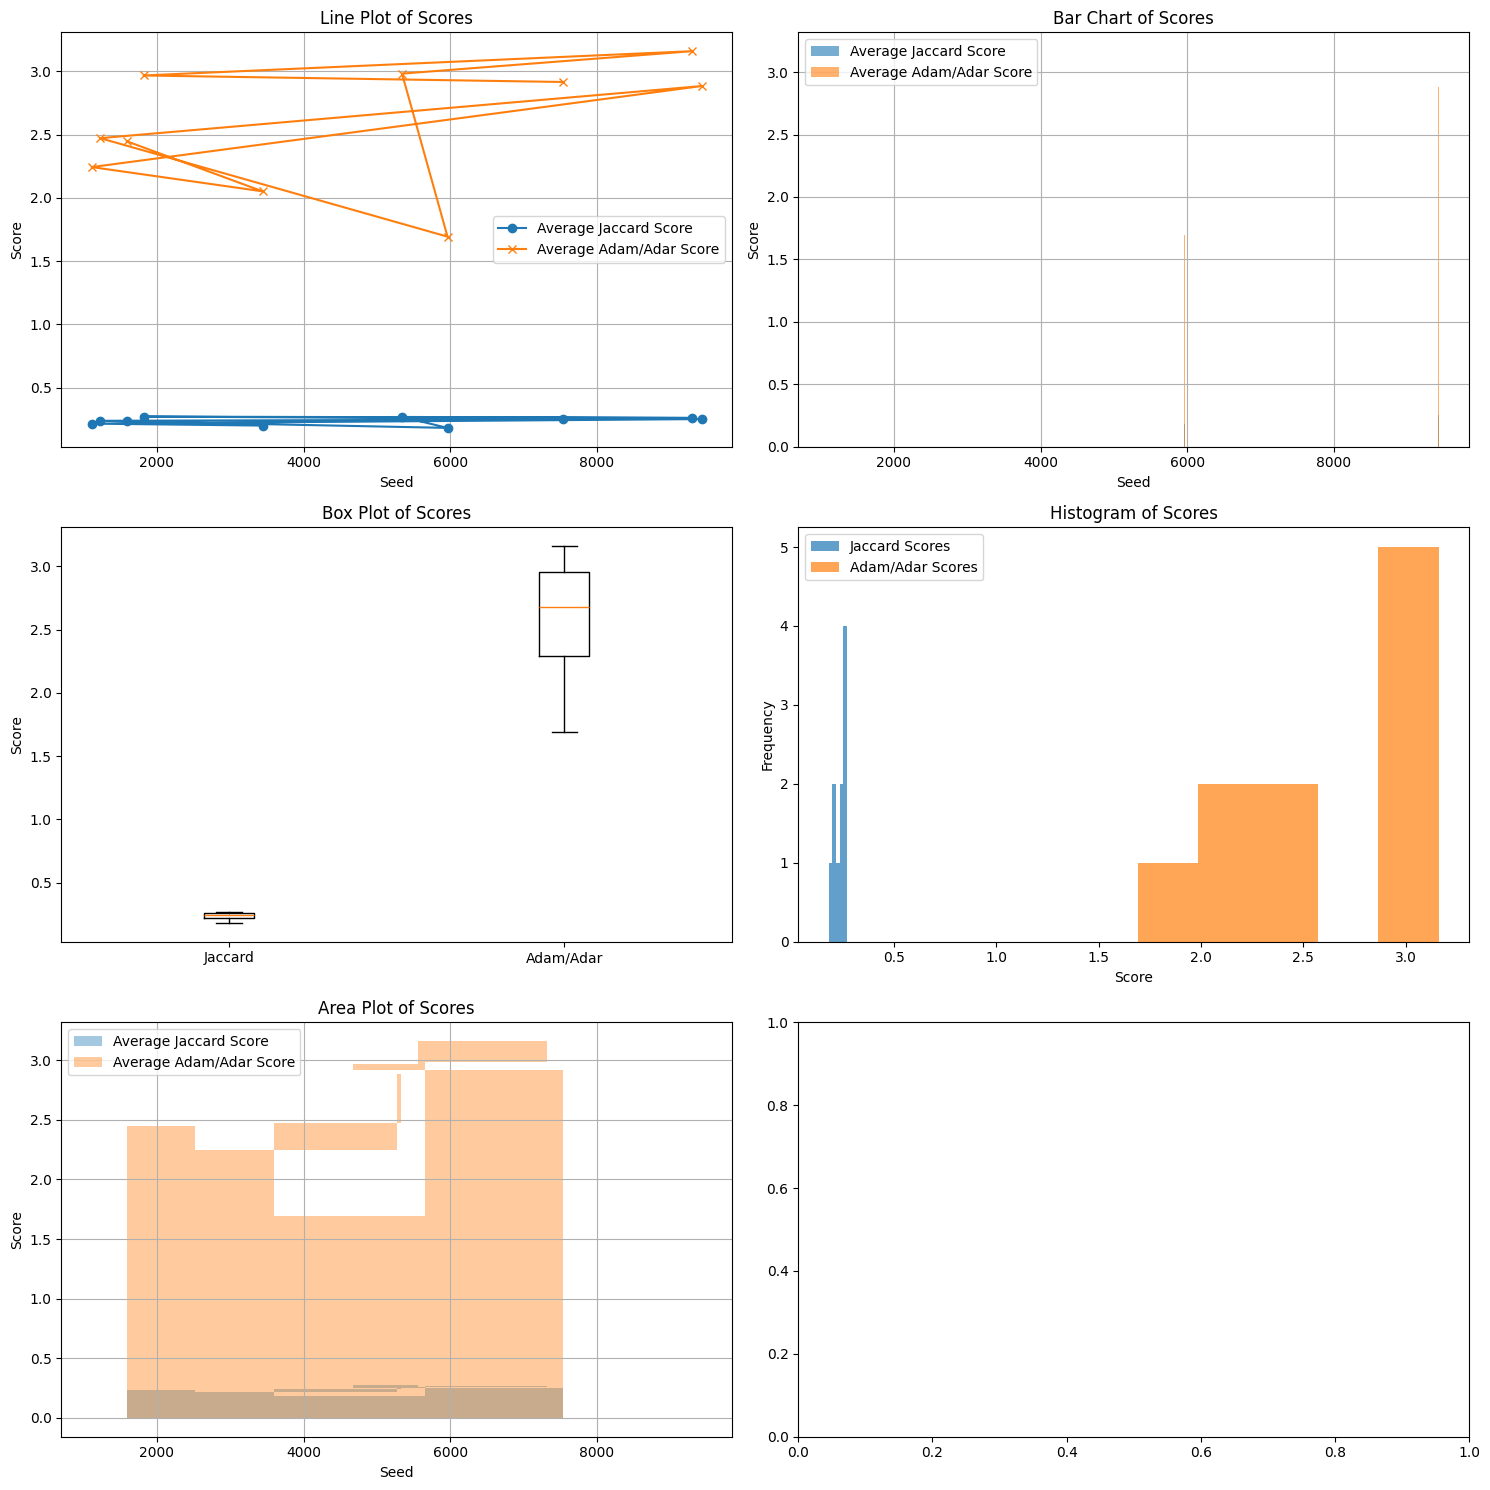

In [27]:
# Modify the plotting section to use scatter plot
# plt.figure(figsize=(10, 5))
# plt.scatter(seeds, jaccard_scores, label='Average Jaccard Score', marker='o')
# plt.scatter(seeds, adamic_adar_scores, label='Average Adam/Adar Score', marker='x')
# plt.xlabel('Seed')
# plt.ylabel('Score')
# plt.title('Average Jaccard and Adam/Adar Scores for Different Seeds')
# plt.legend()
# plt.grid(True)
# plt.show()

fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 3x2 grid of subplots

# Line Plot
axs[0, 0].plot(seeds, jaccard_scores, label='Average Jaccard Score', marker='o')
axs[0, 0].plot(seeds, adamic_adar_scores, label='Average Adam/Adar Score', marker='x')
axs[0, 0].set_title('Line Plot of Scores')
axs[0, 0].set_xlabel('Seed')
axs[0, 0].set_ylabel('Score')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Bar Chart
axs[0, 1].bar(seeds, jaccard_scores, label='Average Jaccard Score', alpha=0.6)
axs[0, 1].bar(seeds, adamic_adar_scores, label='Average Adam/Adar Score', alpha=0.6)
axs[0, 1].set_title('Bar Chart of Scores')
axs[0, 1].set_xlabel('Seed')
axs[0, 1].set_ylabel('Score')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Box Plot
data = [jaccard_scores, adamic_adar_scores]
axs[1, 0].boxplot(data, labels=['Jaccard', 'Adam/Adar'])
axs[1, 0].set_title('Box Plot of Scores')
axs[1, 0].set_ylabel('Score')

# Histogram
axs[1, 1].hist(jaccard_scores, bins=5, alpha=0.7, label='Jaccard Scores')
axs[1, 1].hist(adamic_adar_scores, bins=5, alpha=0.7, label='Adam/Adar Scores')
axs[1, 1].set_title('Histogram of Scores')
axs[1, 1].set_xlabel('Score')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].legend()

# Area Plot
axs[2, 0].fill_between(seeds, jaccard_scores, label='Average Jaccard Score', step='mid', alpha=0.4)
axs[2, 0].fill_between(seeds, adamic_adar_scores, label='Average Adam/Adar Score', step='mid', alpha=0.4)
axs[2, 0].set_title('Area Plot of Scores')
axs[2, 0].set_xlabel('Seed')
axs[2, 0].set_ylabel('Score')
axs[2, 0].legend()
axs[2, 0].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

---

In [28]:
# import numpy as np
# import core_rec as cs
# import vish_graphs as vg
# import pandas as pd
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# import matplotlib.pyplot as plt
# import random
# import os
# import matplotlib.pyplot as plt
# from matplotlib.ticker import FuncFormatter


# def test_scores_for_different_node_counts(node_counts, seed=23, top_k=5, num_epochs=10):
#     jaccard_scores = []
#     adamic_adar_scores = []

#     for num_nodes in node_counts:
#         # Generate random graph
#         file_path = vg.generate_random_graph(num_nodes, seed=seed)
#         adj_matrix = np.loadtxt(file_path, delimiter=",")

#         # Convert adjacency matrix to dataset
#         graph_dataset = cs.GraphDataset(adj_matrix)
#         data_loader = DataLoader(graph_dataset, batch_size=5, shuffle=True)

#         # Define model parameters
#         num_layers = 2
#         d_model = 128
#         num_heads = 8
#         d_feedforward = 512
#         input_dim = len(adj_matrix[0])

#         # Initialize model, loss function, and optimizer
#         model = cs.GraphTransformer(num_layers, d_model, num_heads, d_feedforward, input_dim)
#         criterion = nn.MSELoss()
#         optimizer = optim.Adam(model.parameters(), lr=0.001)

#         # Train the model
#         cs.train_model(model, data_loader, criterion, optimizer, num_epochs)

#         # Predict recommendations for a specific node
#         node_index = 2  # target node
#         recommended_nodes = cs.predict(model, adj_matrix, node_index, top_k=top_k)

#         # Calculate scores
#         aaj, aaj2 = cs.aaj_accuracy(adj_matrix, node_index, recommended_nodes)
#         jaccard_scores.append(aaj)
#         adamic_adar_scores.append(aaj2)

#     return jaccard_scores, adamic_adar_scores
 
# # Generate node counts from 20 to 200
# node_counts = range(20, 201, 20)

# # Test scores
# jaccard_scores, adamic_adar_scores = test_scores_for_different_node_counts(node_counts)

# # Function to format the y-axis ticks to show more decimal places
# def format_ticks(x, pos):
#     return f'{x:.2f}'  # Change '.2f' to however many decimal places you need

# # Assuming jaccard_scores and adamic_adar_scores are already computed and available
# fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 3x2 grid of subplots

# # Line Plot
# axs[0, 0].plot(node_counts, jaccard_scores, label='Average Jaccard Score', marker='o')
# axs[0, 0].plot(node_counts, adamic_adar_scores, label='Average Adam/Adar Score', marker='x')
# axs[0, 0].set_title('Line Plot of Scores')
# axs[0, 0].set_xlabel('Number of Nodes')
# axs[0, 0].set_ylabel('Score')
# axs[0, 0].legend()
# axs[0, 0].grid(True)
# axs[0, 0].yaxis.set_major_formatter(FuncFormatter(format_ticks))

# # Bar Chart
# axs[0, 1].bar(node_counts, jaccard_scores, label='Average Jaccard Score', alpha=0.6)
# axs[0, 1].bar(node_counts, adamic_adar_scores, label='Average Adam/Adar Score', alpha=0.6)
# axs[0, 1].set_title('Bar Chart of Scores')
# axs[0, 1].set_xlabel('Number of Nodes')
# axs[0, 1].set_ylabel('Score')
# axs[0, 1].legend()
# axs[0, 1].grid(True)
# axs[0, 1].yaxis.set_major_formatter(FuncFormatter(format_ticks))

# # Box Plot
# data = [jaccard_scores, adamic_adar_scores]
# axs[1, 0].boxplot(data, labels=['Jaccard', 'Adam/Adar'])
# axs[1, 0].set_title('Box Plot of Scores')
# axs[1, 0].set_ylabel('Score')
# axs[1, 0].yaxis.set_major_formatter(FuncFormatter(format_ticks))

# # Histogram
# axs[1, 1].hist(jaccard_scores, bins=len(node_counts), alpha=0.7, label='Jaccard Scores')
# axs[1, 1].hist(adamic_adar_scores, bins=len(node_counts), alpha=0.7, label='Adam/Adar Scores')
# axs[1, 1].set_title('Histogram of Scores')
# axs[1, 1].set_xlabel('Score')
# axs[1, 1].set_ylabel('Frequency')
# axs[1, 1].legend()
# axs[1, 1].yaxis.set_major_formatter(FuncFormatter(format_ticks))

# # Area Plot
# axs[2, 0].fill_between(node_counts, jaccard_scores, label='Average Jaccard Score', step='mid', alpha=0.4)
# axs[2, 0].fill_between(node_counts, adamic_adar_scores, label='Average Adam/Adar Score', step='mid', alpha=0.4)
# axs[2, 0].set_title('Area Plot of Scores')
# axs[2, 0].set_xlabel('Number of Nodes')
# axs[2, 0].set_ylabel('Score')
# axs[2, 0].legend()
# axs[2, 0].grid(True)
# axs[2, 0].yaxis.set_major_formatter(FuncFormatter(format_ticks))

# # Adjust layout
# plt.tight_layout()
# plt.show()


---

Generating graph: 100%|██████████| 20/20 [00:00<00:00, 208154.04it/s]


Epoch 1/10, Loss: 0.3605826497077942
Epoch 2/10, Loss: 0.19397468864917755
Epoch 3/10, Loss: 0.17491622269153595
Epoch 4/10, Loss: 0.15324580669403076
Epoch 5/10, Loss: 0.12856130301952362
Epoch 6/10, Loss: 0.09562414884567261
Epoch 7/10, Loss: 0.05130968987941742
Epoch 8/10, Loss: 0.06211281940340996
Epoch 9/10, Loss: 0.041863732039928436
Epoch 10/10, Loss: 0.050400495529174805


Generating graph: 100%|██████████| 40/40 [00:00<00:00, 148077.81it/s]


Epoch 1/10, Loss: 0.23409992456436157
Epoch 2/10, Loss: 0.17411114275455475
Epoch 3/10, Loss: 0.17653615772724152
Epoch 4/10, Loss: 0.17792436480522156
Epoch 5/10, Loss: 0.10182509571313858
Epoch 6/10, Loss: 0.07994896918535233
Epoch 7/10, Loss: 0.09226840734481812
Epoch 8/10, Loss: 0.060220230370759964
Epoch 9/10, Loss: 0.05099739134311676
Epoch 10/10, Loss: 0.046702709048986435


Generating graph: 100%|██████████| 60/60 [00:00<00:00, 107362.73it/s]

Epoch 1/10, Loss: 0.2498607337474823
Epoch 2/10, Loss: 0.19166997075080872
Epoch 3/10, Loss: 0.18279950320720673
Epoch 4/10, Loss: 0.16918838024139404


Epoch 5/10, Loss: 0.16561606526374817
Epoch 6/10, Loss: 0.12579220533370972
Epoch 7/10, Loss: 0.10406354814767838
Epoch 8/10, Loss: 0.08204861730337143
Epoch 9/10, Loss: 0.06702963262796402
Epoch 10/10, Loss: 0.050863511860370636


Generating graph: 100%|██████████| 80/80 [00:00<00:00, 84392.43it/s]

Epoch 1/10, Loss: 0.2386818677186966


Epoch 2/10, Loss: 0.15646080672740936
Epoch 3/10, Loss: 0.16072291135787964
Epoch 4/10, Loss: 0.198189377784729
Epoch 5/10, Loss: 0.1897740513086319
Epoch 6/10, Loss: 0.1544831246137619
Epoch 7/10, Loss: 0.11946188658475876
Epoch 8/10, Loss: 0.09863073378801346
Epoch 9/10, Loss: 0.09092628210783005
Epoch 10/10, Loss: 0.0733860582113266


Generating graph: 100%|██████████| 100/100 [00:00<00:00, 66397.09it/s]

Epoch 1/10, Loss: 0.19458965957164764


Epoch 2/10, Loss: 0.1899084597826004
Epoch 3/10, Loss: 0.19644559919834137
Epoch 4/10, Loss: 0.16487736999988556
Epoch 5/10, Loss: 0.12288636714220047
Epoch 6/10, Loss: 0.1337006688117981
Epoch 7/10, Loss: 0.11128662526607513
Epoch 8/10, Loss: 0.07284191995859146
Epoch 9/10, Loss: 0.07758422940969467
Epoch 10/10, Loss: 0.07210417091846466


Generating graph: 100%|██████████| 120/120 [00:00<00:00, 56311.98it/s]

Epoch 1/10, Loss: 0.21234069764614105
Epoch 2/10, Loss: 0.22791987657546997


Epoch 3/10, Loss: 0.16360773146152496
Epoch 4/10, Loss: 0.18022631108760834
Epoch 5/10, Loss: 0.1949407309293747
Epoch 6/10, Loss: 0.1434669941663742
Epoch 7/10, Loss: 0.13471128046512604
Epoch 8/10, Loss: 0.10151452571153641
Epoch 9/10, Loss: 0.09568473696708679
Epoch 10/10, Loss: 0.08299282193183899


Generating graph: 100%|██████████| 140/140 [00:00<00:00, 48095.88it/s]

Epoch 1/10, Loss: 0.2067430168390274


Epoch 2/10, Loss: 0.19847063720226288
Epoch 3/10, Loss: 0.18244464695453644
Epoch 4/10, Loss: 0.18518640100955963
Epoch 5/10, Loss: 0.1452057808637619
Epoch 6/10, Loss: 0.11636696010828018
Epoch 7/10, Loss: 0.11891710758209229
Epoch 8/10, Loss: 0.11314001679420471
Epoch 9/10, Loss: 0.08323957026004791
Epoch 10/10, Loss: 0.09651526063680649


Generating graph: 100%|██████████| 160/160 [00:00<00:00, 40694.24it/s]


Epoch 1/10, Loss: 0.2230995148420334
Epoch 2/10, Loss: 0.17061324417591095
Epoch 3/10, Loss: 0.2503232955932617
Epoch 4/10, Loss: 0.17565414309501648
Epoch 5/10, Loss: 0.1332128942012787
Epoch 6/10, Loss: 0.1305469125509262
Epoch 7/10, Loss: 0.10230850428342819
Epoch 8/10, Loss: 0.10940515249967575
Epoch 9/10, Loss: 0.10245060175657272
Epoch 10/10, Loss: 0.08683576434850693


Generating graph: 100%|██████████| 180/180 [00:00<00:00, 37887.02it/s]


Epoch 1/10, Loss: 0.19345280528068542
Epoch 2/10, Loss: 0.1950254589319229
Epoch 3/10, Loss: 0.17088861763477325
Epoch 4/10, Loss: 0.1547258049249649
Epoch 5/10, Loss: 0.14618398249149323
Epoch 6/10, Loss: 0.13302506506443024
Epoch 7/10, Loss: 0.10153359919786453
Epoch 8/10, Loss: 0.08274491131305695
Epoch 9/10, Loss: 0.08848161995410919
Epoch 10/10, Loss: 0.07648993283510208


Generating graph: 100%|██████████| 200/200 [00:00<00:00, 33467.42it/s]


Epoch 1/10, Loss: 0.17929215729236603
Epoch 2/10, Loss: 0.17789912223815918
Epoch 3/10, Loss: 0.17956744134426117
Epoch 4/10, Loss: 0.176789328455925
Epoch 5/10, Loss: 0.14943040907382965
Epoch 6/10, Loss: 0.18058845400810242
Epoch 7/10, Loss: 0.129167377948761
Epoch 8/10, Loss: 0.10438594222068787
Epoch 9/10, Loss: 0.09816857427358627
Epoch 10/10, Loss: 0.0786786675453186


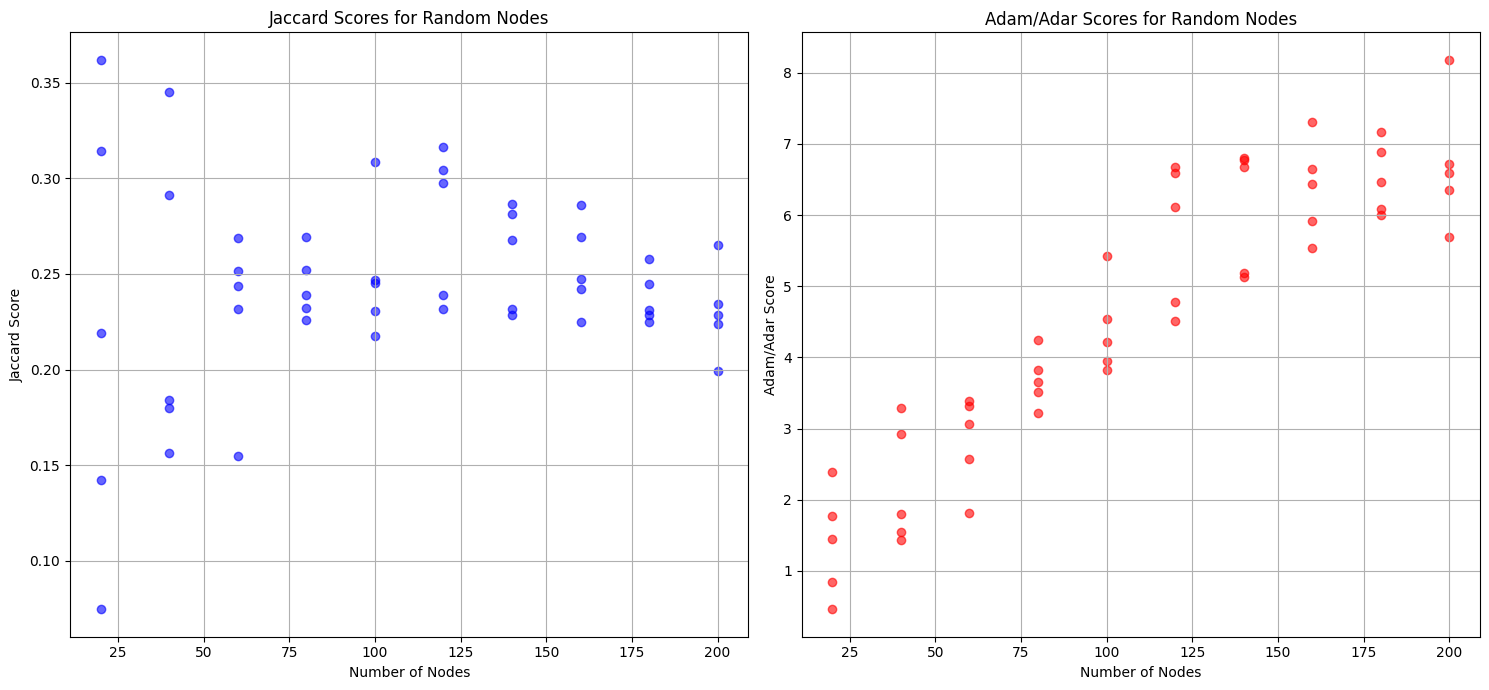

In [29]:


import numpy as np
import core_rec as cs
import vish_graphs as vg
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import random
import os
from matplotlib.ticker import FuncFormatter

def test_scores_for_random_nodes(node_counts, num_random_nodes=5, top_k=5, num_epochs=10, seed=23):
    jaccard_scores = []
    adamic_adar_scores = []
    nodes_selected = []

    for num_nodes in node_counts:
        file_path = vg.generate_random_graph(num_nodes, seed=seed)
        adj_matrix = np.loadtxt(file_path, delimiter=",")
        graph_dataset = cs.GraphDataset(adj_matrix)
        data_loader = DataLoader(graph_dataset, batch_size=5, shuffle=True)
        num_layers = 2
        d_model = 128
        num_heads = 8
        d_feedforward = 512
        input_dim = len(adj_matrix[0])
        model = cs.GraphTransformer(num_layers, d_model, num_heads, d_feedforward, input_dim)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        cs.train_model(model, data_loader, criterion, optimizer, num_epochs)

        for _ in range(num_random_nodes):
            node_index = random.randint(0, num_nodes - 1)
            recommended_nodes = cs.predict(model, adj_matrix, node_index, top_k=top_k)
            aaj, aaj2 = cs.aaj_accuracy(adj_matrix, node_index, recommended_nodes)
            jaccard_scores.append(aaj)
            adamic_adar_scores.append(aaj2)
            nodes_selected.append((num_nodes, node_index))

    return nodes_selected, jaccard_scores, adamic_adar_scores

# Generate node counts from 20 to 200
node_counts = range(20, 201, 20)

# Test scores
nodes_selected, jaccard_scores, adamic_adar_scores = test_scores_for_random_nodes(node_counts)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Scatter plot for Jaccard Scores
axs[0].scatter([n[0] for n in nodes_selected], jaccard_scores, c='blue', label='Jaccard Scores', alpha=0.6)
axs[0].set_title('Jaccard Scores for Random Nodes')
axs[0].set_xlabel('Number of Nodes')
axs[0].set_ylabel('Jaccard Score')
axs[0].grid(True)

# Scatter plot for Adam/Adar Scores
axs[1].scatter([n[0] for n in nodes_selected], adamic_adar_scores, c='red', label='Adam/Adar Scores', alpha=0.6)
axs[1].set_title('Adam/Adar Scores for Random Nodes')
axs[1].set_xlabel('Number of Nodes')
axs[1].set_ylabel('Adam/Adar Score')
axs[1].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

---

Generating graph: 100%|██████████| 300/300 [00:00<00:00, 18836.98it/s]

Epoch 1/10, Loss: 0.20507961511611938
Epoch 2/10, Loss: 0.2194465696811676
Epoch 3/10, Loss: 0.16252708435058594
Epoch 4/10, Loss: 0.1906680166721344
Epoch 5/10, Loss: 0.12535446882247925
Epoch 6/10, Loss: 0.13290122151374817
Epoch 7/10, Loss: 0.12903600931167603
Epoch 8/10, Loss: 0.09210801124572754
Epoch 9/10, Loss: 0.09903004765510559
Epoch 10/10, Loss: 0.0702202096581459


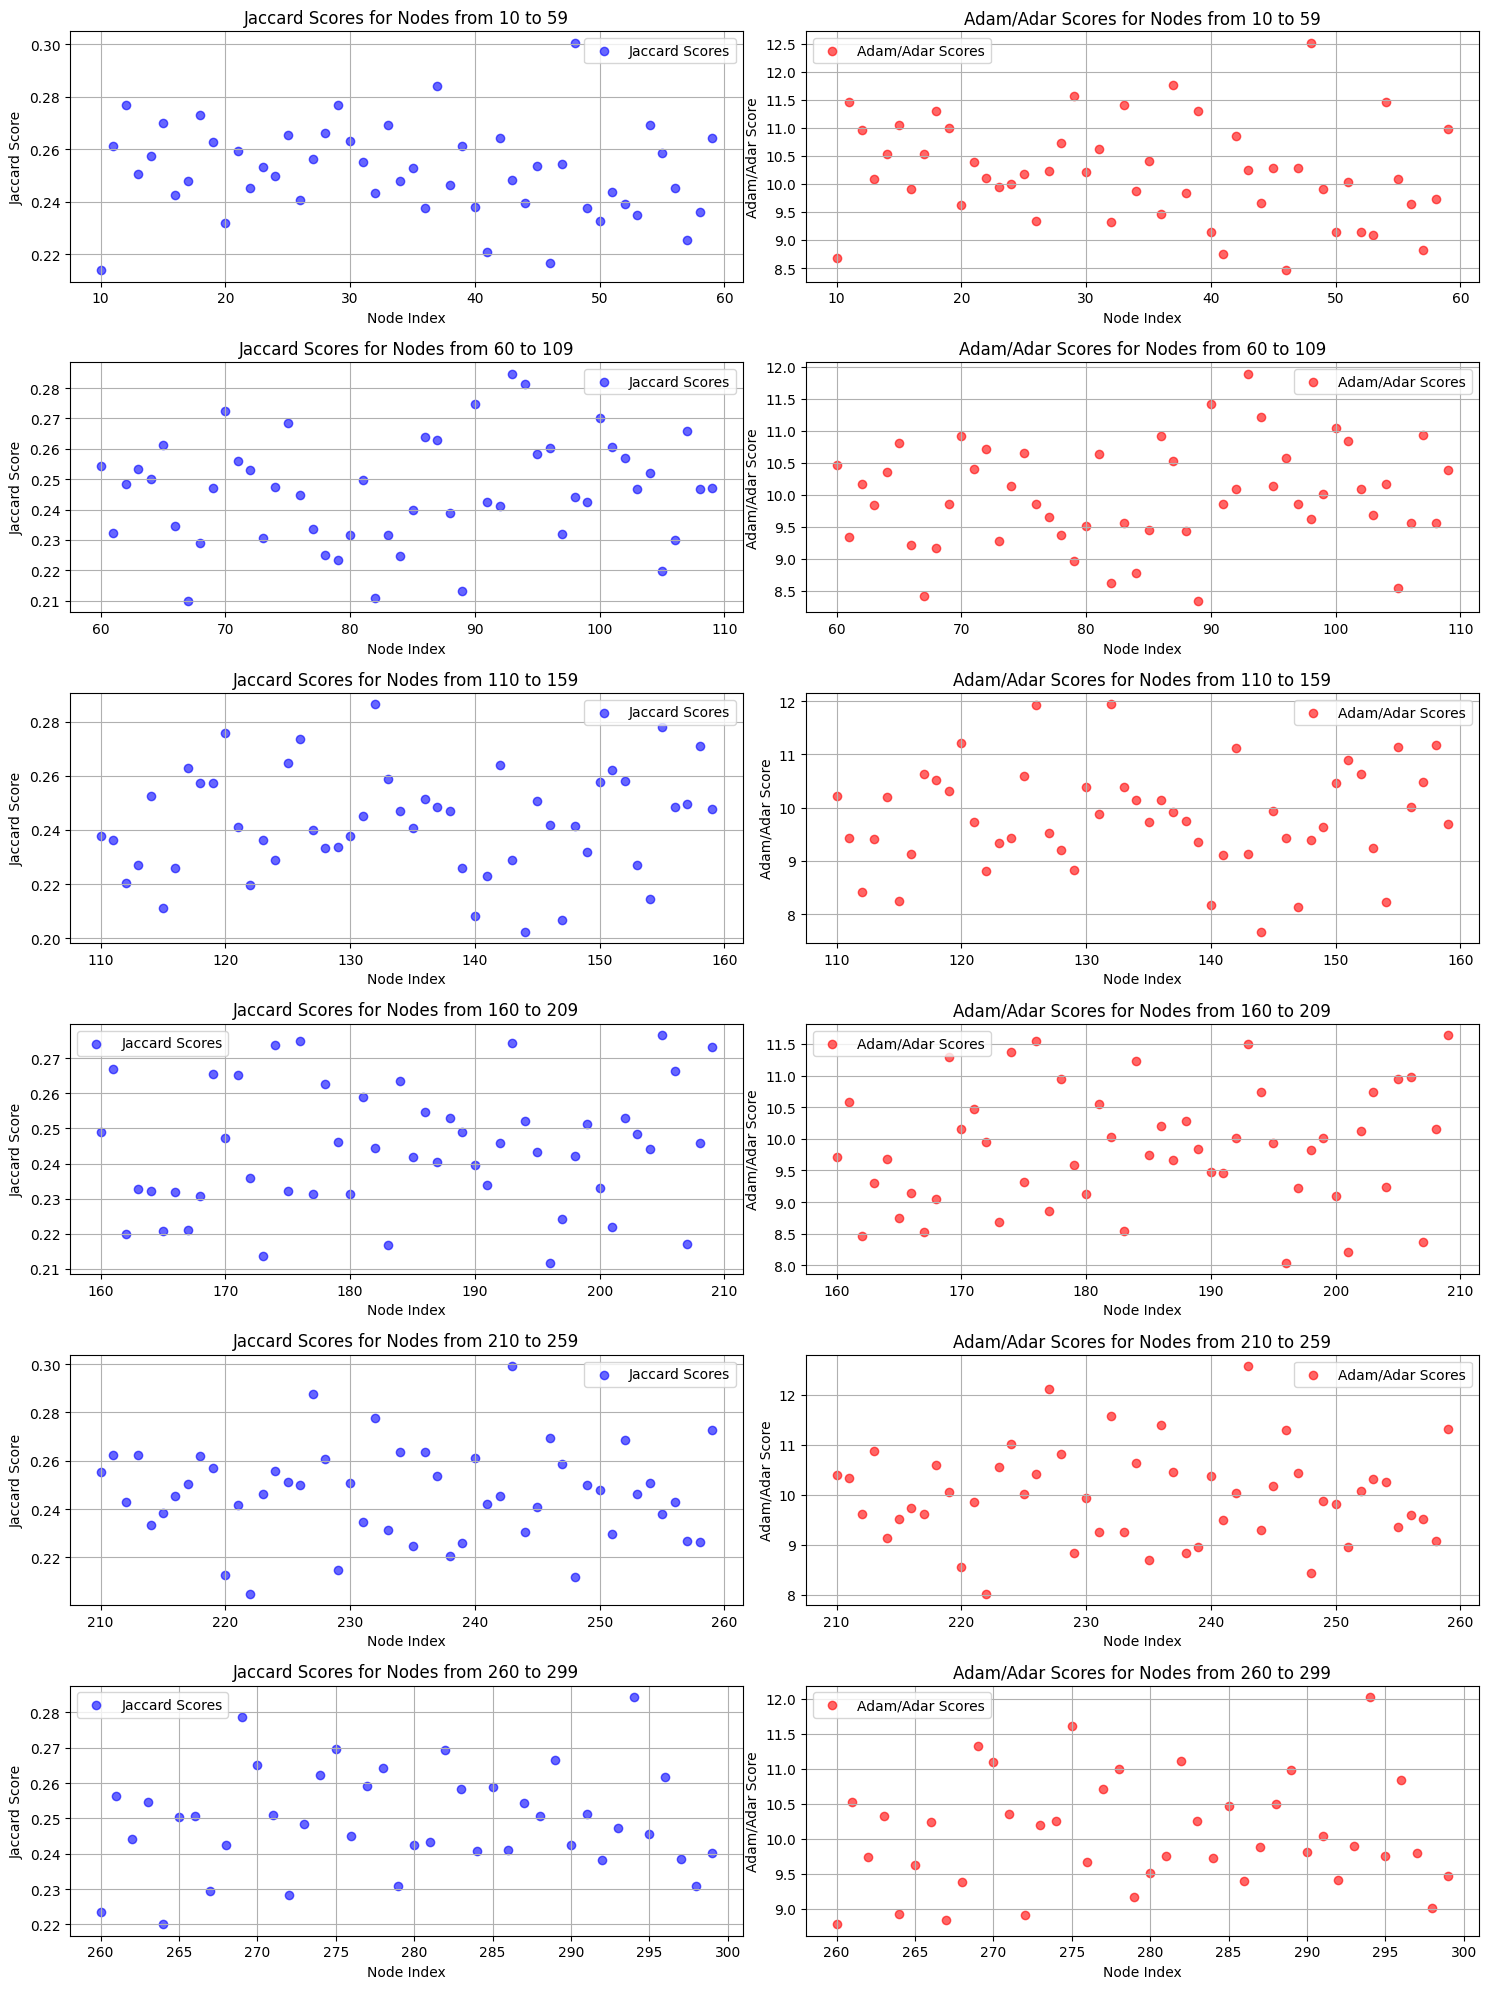

In [30]:
import numpy as np
import core_rec as cs
import vish_graphs as vg
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import random
import os
from matplotlib.ticker import FuncFormatter

def test_scores_for_nodes_range(num_nodes, start_node, end_node, top_k=5, num_epochs=10, seed=23):
    jaccard_scores = []
    adamic_adar_scores = []
    node_indices = range(start_node, end_node + 1)

    # Generate random graph
    file_path = vg.generate_random_graph(num_nodes, seed=seed)
    adj_matrix = np.loadtxt(file_path, delimiter=",")
    graph_dataset = cs.GraphDataset(adj_matrix)
    data_loader = DataLoader(graph_dataset, batch_size=5, shuffle=True)
    num_layers = 2
    d_model = 128
    num_heads = 8
    d_feedforward = 512
    input_dim = len(adj_matrix[0])
    model = cs.GraphTransformer(num_layers, d_model, num_heads, d_feedforward, input_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    cs.train_model(model, data_loader, criterion, optimizer, num_epochs)

    for node_index in node_indices:
        recommended_nodes = cs.predict(model, adj_matrix, node_index, top_k=top_k)
        aaj, aaj2 = cs.aaj_accuracy(adj_matrix, node_index, recommended_nodes)
        jaccard_scores.append(aaj)
        adamic_adar_scores.append(aaj2)

    return node_indices, jaccard_scores, adamic_adar_scores

# Number of nodes in the graph
num_nodes = 300
# Node index range to test
start_node = 10
end_node = 300

# Test scores
node_indices, jaccard_scores, adamic_adar_scores = test_scores_for_nodes_range(num_nodes, start_node, end_node - 1)

# Define ranges for drilling down
ranges = [(10, 60), (60, 110), (110, 160), (160, 210), (210, 260), (260, 300)]

# Plotting
fig, axs = plt.subplots(len(ranges), 2, figsize=(15, 20))

for i, (start, end) in enumerate(ranges):
    range_indices = range(start, end)
    range_jaccard_scores = jaccard_scores[start-10:end-10]
    range_adamic_adar_scores = adamic_adar_scores[start-10:end-10]

    # Scatter plot for Jaccard Scores
    axs[i, 0].scatter(range_indices, range_jaccard_scores, c='blue', label='Jaccard Scores', alpha=0.6)
    axs[i, 0].set_title(f'Jaccard Scores for Nodes from {start} to {end-1}')
    axs[i, 0].set_xlabel('Node Index')
    axs[i, 0].set_ylabel('Jaccard Score')
    axs[i, 0].legend()
    axs[i, 0].grid(True)

    # Scatter plot for Adam/Adar Scores
    axs[i, 1].scatter(range_indices, range_adamic_adar_scores, c='red', label='Adam/Adar Scores', alpha=0.6)
    axs[i, 1].set_title(f'Adam/Adar Scores for Nodes from {start} to {end-1}')
    axs[i, 1].set_xlabel('Node Index')
    axs[i, 1].set_ylabel('Adam/Adar Score')
    axs[i, 1].legend()
    axs[i, 1].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

---

Generating graph: 100%|██████████| 300/300 [00:00<00:00, 20897.33it/s]

Epoch 1/10, Loss: 0.19508402049541473
Epoch 2/10, Loss: 0.20413298904895782
Epoch 3/10, Loss: 0.1801154613494873
Epoch 4/10, Loss: 0.19019901752471924
Epoch 5/10, Loss: 0.1261894404888153
Epoch 6/10, Loss: 0.11664921790361404
Epoch 7/10, Loss: 0.13813145458698273
Epoch 8/10, Loss: 0.10751215368509293
Epoch 9/10, Loss: 0.09297682344913483
Epoch 10/10, Loss: 0.08650815486907959


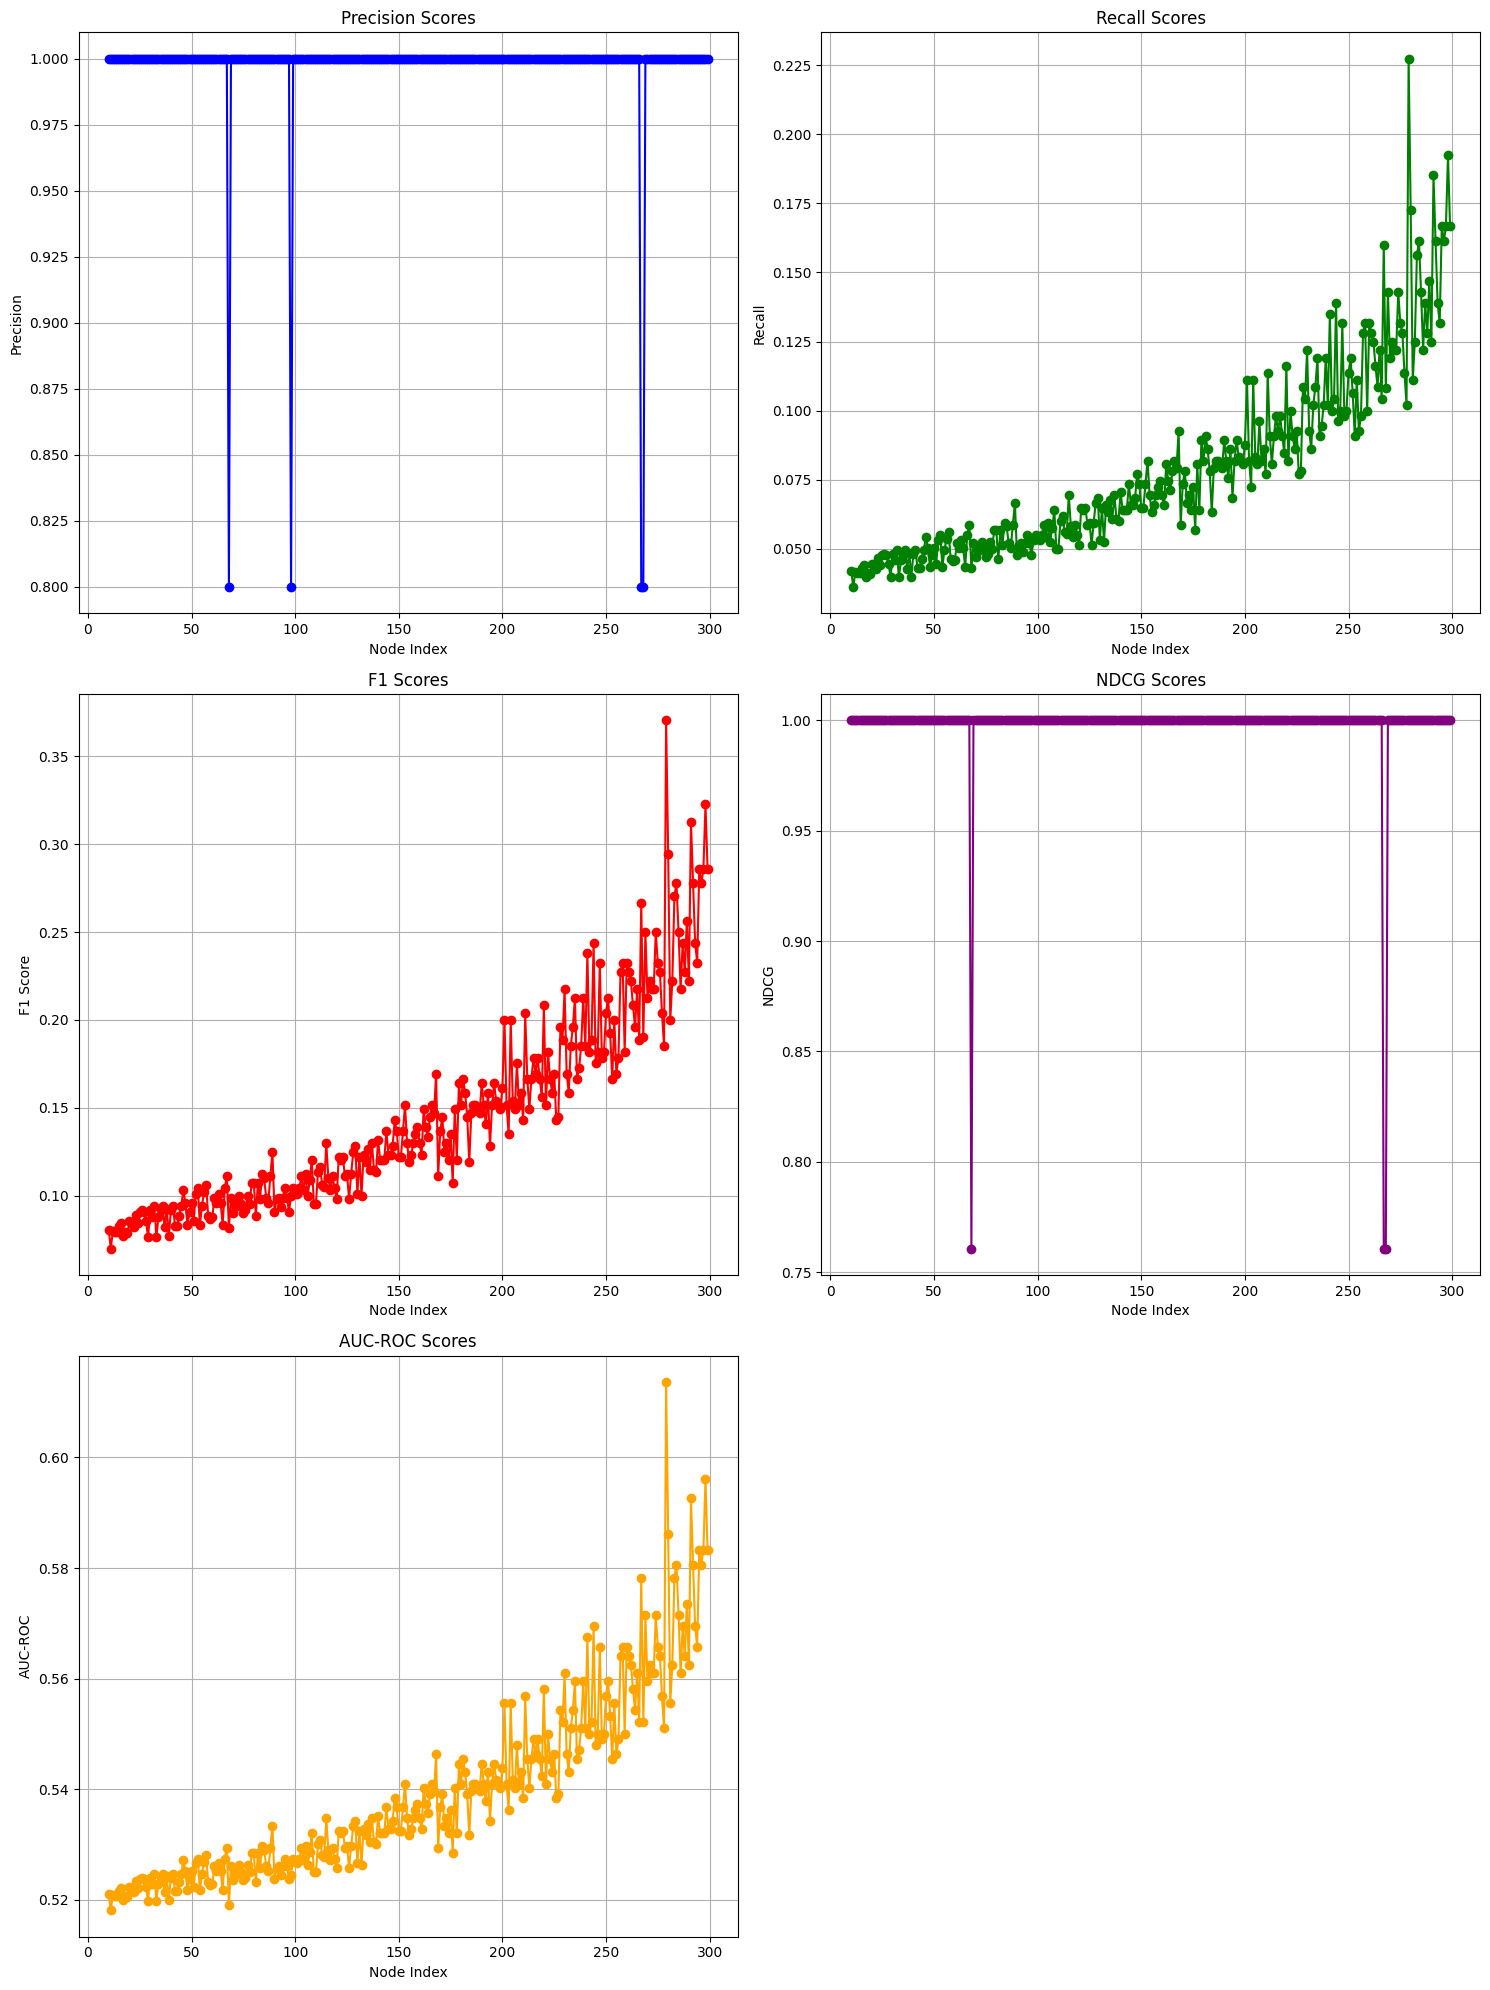

In [31]:
import numpy as np
import core_rec as cs
import vish_graphs as vg
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import random
import os
from sklearn.metrics import precision_score, recall_score, f1_score, ndcg_score, roc_auc_score

def evaluate_recommendations(adj_matrix, node_index, recommended_nodes, top_k=5):
    true_neighbors = set(np.where(adj_matrix[node_index] > 0)[0])
    recommended_set = set(recommended_nodes)
    
    # Precision, Recall, F1 Score
    precision = len(true_neighbors & recommended_set) / len(recommended_set)
    recall = len(true_neighbors & recommended_set) / len(true_neighbors)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # NDCG
    relevance = [1 if i in true_neighbors else 0 for i in recommended_nodes]
    ndcg = ndcg_score([relevance], [list(range(len(relevance)))])
    
    # AUC-ROC
    y_true = [1 if i in true_neighbors else 0 for i in range(len(adj_matrix))]
    y_scores = [1 if i in recommended_set else 0 for i in range(len(adj_matrix))]
    auc_roc = roc_auc_score(y_true, y_scores)
    
    return precision, recall, f1, ndcg, auc_roc

def test_scores_for_nodes_range(num_nodes, start_node, end_node, top_k=5, num_epochs=10, seed=23):
    precision_scores = []
    recall_scores = []
    f1_scores = []
    ndcg_scores = []
    auc_roc_scores = []
    node_indices = range(start_node, end_node + 1)

    # Generate random graph
    file_path = vg.generate_random_graph(num_nodes, seed=seed)
    adj_matrix = np.loadtxt(file_path, delimiter=",")
    graph_dataset = cs.GraphDataset(adj_matrix)
    data_loader = DataLoader(graph_dataset, batch_size=5, shuffle=True)
    num_layers = 2
    d_model = 128
    num_heads = 8
    d_feedforward = 512
    input_dim = len(adj_matrix[0])
    model = cs.GraphTransformer(num_layers, d_model, num_heads, d_feedforward, input_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    cs.train_model(model, data_loader, criterion, optimizer, num_epochs)

    for node_index in node_indices:
        recommended_nodes = cs.predict(model, adj_matrix, node_index, top_k=top_k)
        precision, recall, f1, ndcg, auc_roc = evaluate_recommendations(adj_matrix, node_index, recommended_nodes, top_k)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        ndcg_scores.append(ndcg)
        auc_roc_scores.append(auc_roc)

    return node_indices, precision_scores, recall_scores, f1_scores, ndcg_scores, auc_roc_scores

# Number of nodes in the graph
num_nodes = 300
# Node index range to test
start_node = 10
end_node = 300

# Test scores
node_indices, precision_scores, recall_scores, f1_scores, ndcg_scores, auc_roc_scores = test_scores_for_nodes_range(num_nodes, start_node, end_node - 1)

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(15, 20))

# Precision
axs[0, 0].plot(node_indices, precision_scores, label='Precision', marker='o', linestyle='-', color='blue')
axs[0, 0].set_title('Precision Scores')
axs[0, 0].set_xlabel('Node Index')
axs[0, 0].set_ylabel('Precision')
axs[0, 0].grid(True)

# Recall
axs[0, 1].plot(node_indices, recall_scores, label='Recall', marker='o', linestyle='-', color='green')
axs[0, 1].set_title('Recall Scores')
axs[0, 1].set_xlabel('Node Index')
axs[0, 1].set_ylabel('Recall')
axs[0, 1].grid(True)

# F1 Score
axs[1, 0].plot(node_indices, f1_scores, label='F1 Score', marker='o', linestyle='-', color='red')
axs[1, 0].set_title('F1 Scores')
axs[1, 0].set_xlabel('Node Index')
axs[1, 0].set_ylabel('F1 Score')
axs[1, 0].grid(True)

# NDCG
axs[1, 1].plot(node_indices, ndcg_scores, label='NDCG', marker='o', linestyle='-', color='purple')
axs[1, 1].set_title('NDCG Scores')
axs[1, 1].set_xlabel('Node Index')
axs[1, 1].set_ylabel('NDCG')
axs[1, 1].grid(True)

# AUC-ROC
axs[2, 0].plot(node_indices, auc_roc_scores, label='AUC-ROC', marker='o', linestyle='-', color='orange')
axs[2, 0].set_title('AUC-ROC Scores')
axs[2, 0].set_xlabel('Node Index')
axs[2, 0].set_xlabel('Node Index')
axs[2, 0].set_ylabel('AUC-ROC')
axs[2, 0].grid(True)

# Hide the empty subplot (2, 1)
fig.delaxes(axs[2, 1])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Generating graph: 100%|██████████| 300/300 [00:00<00:00, 23064.21it/s]

Epoch 1/100, Loss: 0.1786462664604187
Epoch 2/100, Loss: 0.18575134873390198
Epoch 3/100, Loss: 0.18961268663406372
Epoch 4/100, Loss: 0.1422092318534851
Epoch 5/100, Loss: 0.14547564089298248
Epoch 6/100, Loss: 0.12130174040794373
Epoch 7/100, Loss: 0.09486252814531326
Epoch 8/100, Loss: 0.1306803971529007
Epoch 9/100, Loss: 0.09649590402841568
Epoch 10/100, Loss: 0.0736280083656311
Epoch 11/100, Loss: 0.08429290354251862
Epoch 12/100, Loss: 0.06736046075820923
Epoch 13/100, Loss: 0.06590359658002853
Epoch 14/100, Loss: 0.05737176164984703
Epoch 15/100, Loss: 0.050443314015865326
Epoch 16/100, Loss: 0.04826514795422554
Epoch 17/100, Loss: 0.053715504705905914
Epoch 18/100, Loss: 0.05805853754281998
Epoch 19/100, Loss: 0.04658856615424156
Epoch 20/100, Loss: 0.05082821100950241
Epoch 21/100, Loss: 0.0499565415084362
Epoch 22/100, Loss: 0.04680466279387474
Epoch 23/100, Loss: 0.04532063752412796
Epoch 24/100, Loss: 0.044029600918293
Epoch 25/100, Loss: 0.04024923965334892
Epoch 26/100, 

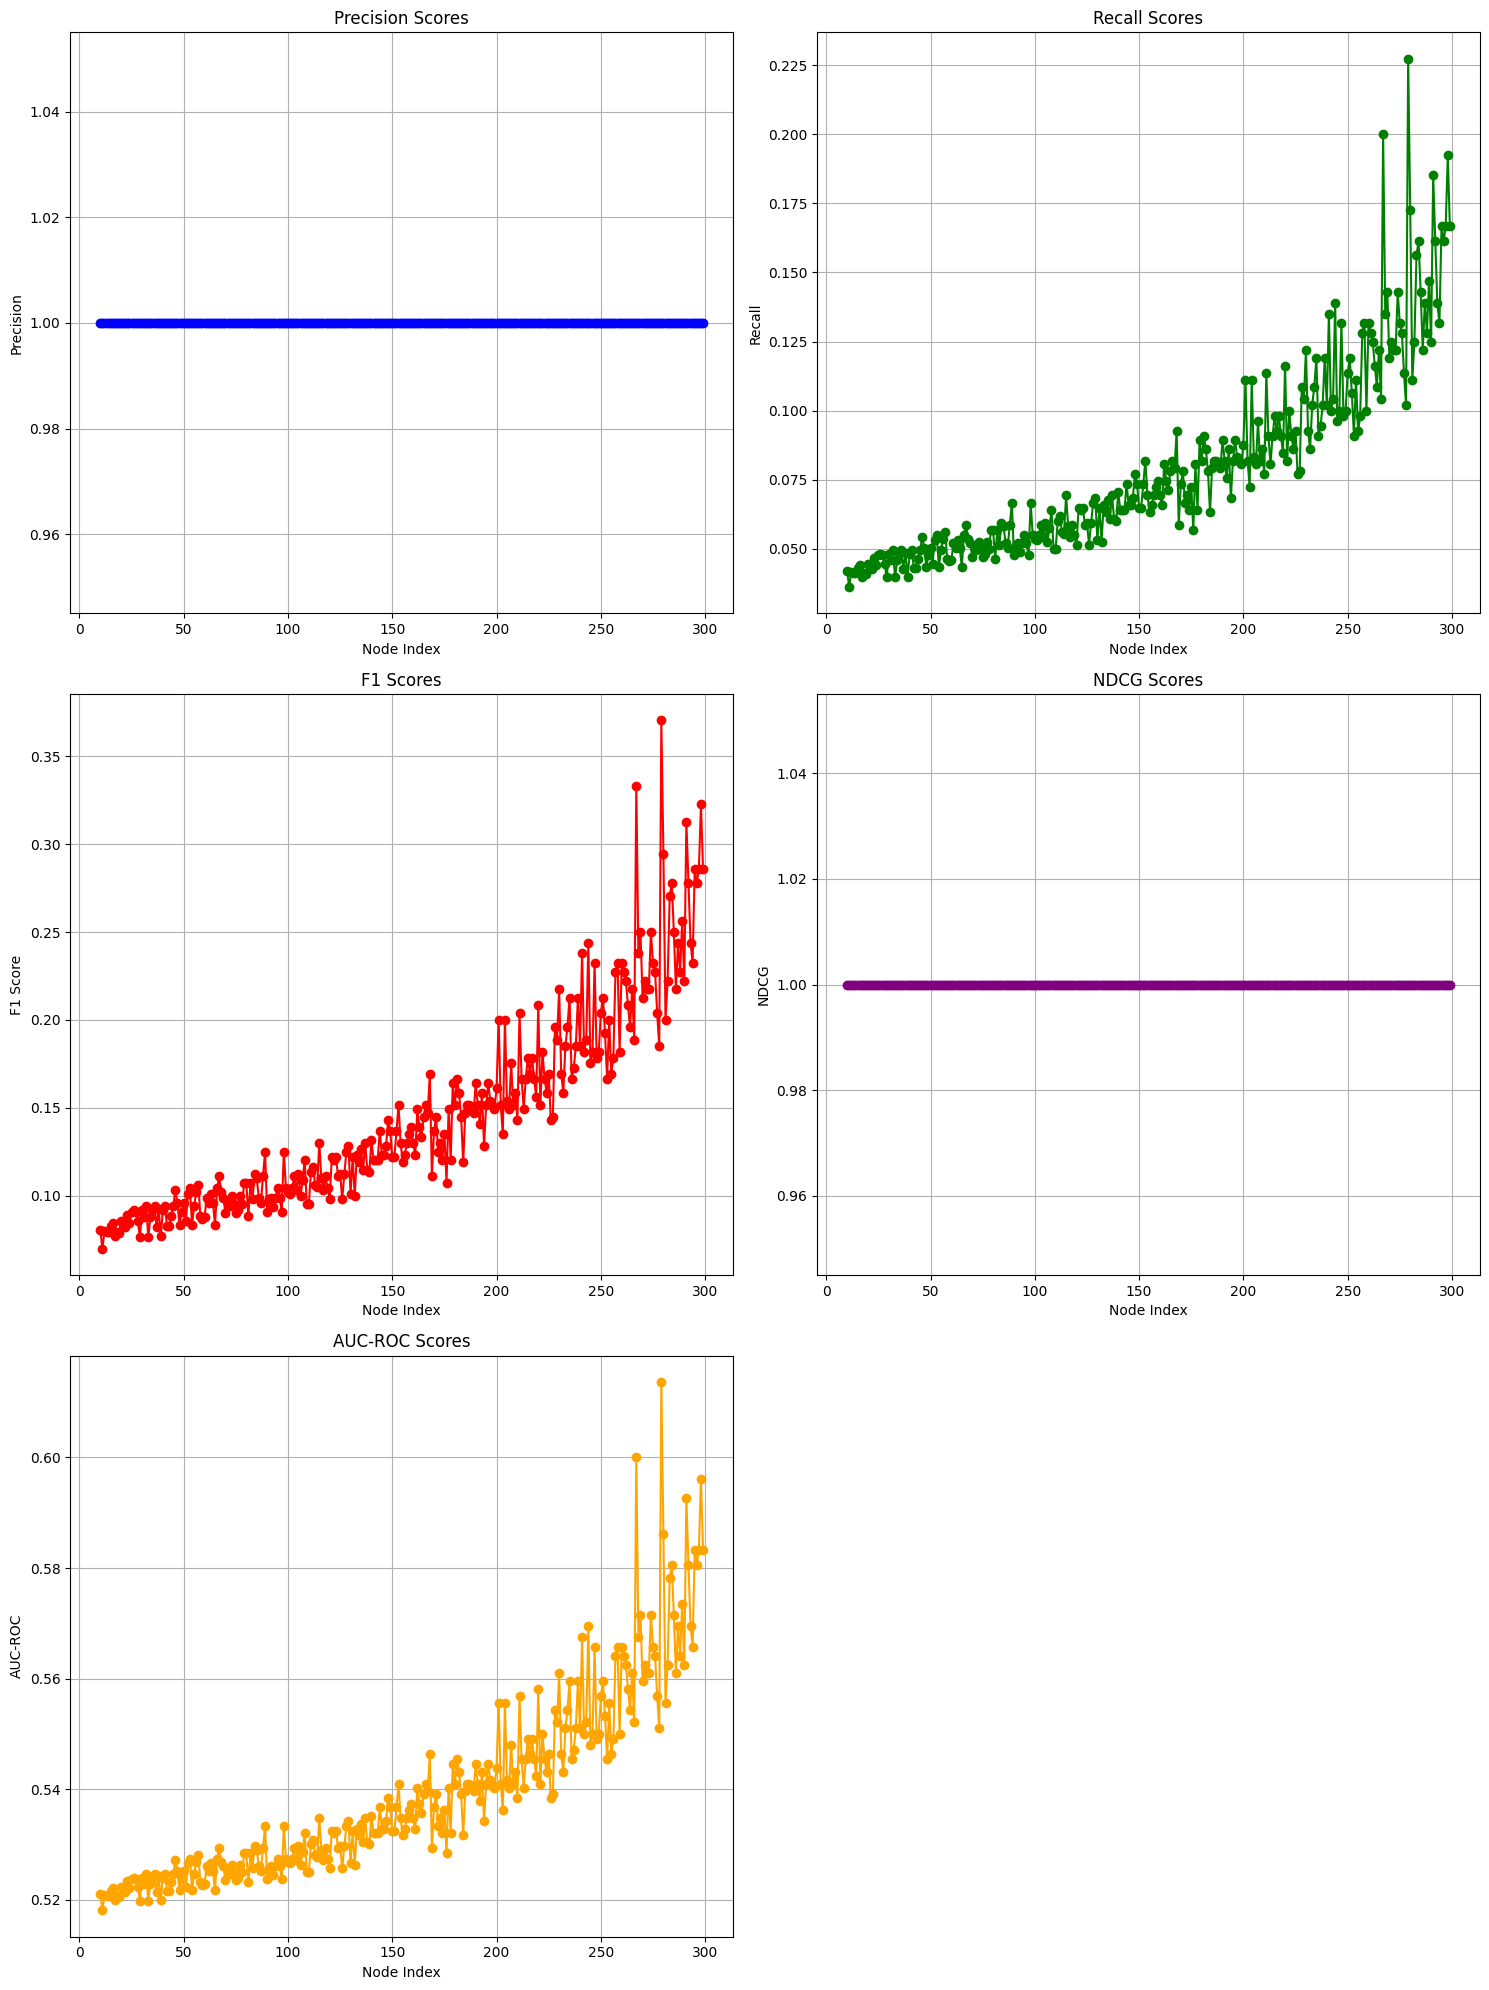

In [32]:
import numpy as np
import core_rec as cs
import vish_graphs as vg
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import random
import os
from sklearn.metrics import precision_score, recall_score, f1_score, ndcg_score, roc_auc_score

def evaluate_recommendations(adj_matrix, node_index, recommended_nodes, top_k=5):
    true_neighbors = set(np.where(adj_matrix[node_index] > 0)[0])
    recommended_set = set(recommended_nodes)
    
    # Precision, Recall, F1 Score
    precision = len(true_neighbors & recommended_set) / len(recommended_set)
    recall = len(true_neighbors & recommended_set) / len(true_neighbors)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # NDCG
    relevance = [1 if i in true_neighbors else 0 for i in recommended_nodes]
    ndcg = ndcg_score([relevance], [list(range(len(relevance)))])
    
    # AUC-ROC
    y_true = [1 if i in true_neighbors else 0 for i in range(len(adj_matrix))]
    y_scores = [1 if i in recommended_set else 0 for i in range(len(adj_matrix))]
    auc_roc = roc_auc_score(y_true, y_scores)
    
    return precision, recall, f1, ndcg, auc_roc

def test_scores_for_nodes_range(num_nodes, start_node, end_node, top_k=5, num_epochs=100, seed=23):
    precision_scores = []
    recall_scores = []
    f1_scores = []
    ndcg_scores = []
    auc_roc_scores = []
    node_indices = range(start_node, end_node + 1)

    # Generate random graph
    file_path = vg.generate_random_graph(num_nodes, seed=seed)
    adj_matrix = np.loadtxt(file_path, delimiter=",")
    graph_dataset = cs.GraphDataset(adj_matrix)
    data_loader = DataLoader(graph_dataset, batch_size=5, shuffle=True)
    num_layers = 2
    d_model = 128
    num_heads = 64
    d_feedforward = 512
    input_dim = len(adj_matrix[0])
    model = cs.GraphTransformer(num_layers, d_model, num_heads, d_feedforward, input_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    cs.train_model(model, data_loader, criterion, optimizer, num_epochs)

    for node_index in node_indices:
        recommended_nodes = cs.predict(model, adj_matrix, node_index, top_k=top_k)
        precision, recall, f1, ndcg, auc_roc = evaluate_recommendations(adj_matrix, node_index, recommended_nodes, top_k)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        ndcg_scores.append(ndcg)
        auc_roc_scores.append(auc_roc)

    return node_indices, precision_scores, recall_scores, f1_scores, ndcg_scores, auc_roc_scores

# Number of nodes in the graph
num_nodes = 300
# Node index range to test
start_node = 10
end_node = 300

# Test scores
node_indices, precision_scores, recall_scores, f1_scores, ndcg_scores, auc_roc_scores = test_scores_for_nodes_range(num_nodes, start_node, end_node - 1)

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(15, 20))

# Precision
axs[0, 0].plot(node_indices, precision_scores, label='Precision', marker='o', linestyle='-', color='blue')
axs[0, 0].set_title('Precision Scores')
axs[0, 0].set_xlabel('Node Index')
axs[0, 0].set_ylabel('Precision')
axs[0, 0].grid(True)

# Recall
axs[0, 1].plot(node_indices, recall_scores, label='Recall', marker='o', linestyle='-', color='green')
axs[0, 1].set_title('Recall Scores')
axs[0, 1].set_xlabel('Node Index')
axs[0, 1].set_ylabel('Recall')
axs[0, 1].grid(True)

# F1 Score
axs[1, 0].plot(node_indices, f1_scores, label='F1 Score', marker='o', linestyle='-', color='red')
axs[1, 0].set_title('F1 Scores')
axs[1, 0].set_xlabel('Node Index')
axs[1, 0].set_ylabel('F1 Score')
axs[1, 0].grid(True)

# NDCG
axs[1, 1].plot(node_indices, ndcg_scores, label='NDCG', marker='o', linestyle='-', color='purple')
axs[1, 1].set_title('NDCG Scores')
axs[1, 1].set_xlabel('Node Index')
axs[1, 1].set_ylabel('NDCG')
axs[1, 1].grid(True)

# AUC-ROC
axs[2, 0].plot(node_indices, auc_roc_scores, label='AUC-ROC', marker='o', linestyle='-', color='orange')
axs[2, 0].set_title('AUC-ROC Scores')
axs[2, 0].set_xlabel('Node Index')
axs[2, 0].set_xlabel('Node Index')
axs[2, 0].set_ylabel('AUC-ROC')
axs[2, 0].grid(True)

# Hide the empty subplot (2, 1)
fig.delaxes(axs[2, 1])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Conclusion

Let's analyze each graph to evaluate the performance of your recommendation model:

1. **Precision Scores**:
   - The precision scores are mostly at 1.0, indicating that when the model makes a recommendation, it is highly likely to be correct.
   - However, there are a few drops in precision, which might indicate some outliers or specific nodes where the model's performance is not as good.

2. **Recall Scores**:
   - The recall scores show a gradual increase as the node index increases.
   - This suggests that the model is able to identify more relevant items for nodes with higher indices.
   - The overall recall values are relatively low, indicating that while the model's recommendations are precise, it might not be capturing all relevant items.

3. **F1 Scores**:
   - The F1 scores, which combine precision and recall, show a similar increasing trend as the recall scores.
   - This indicates that the model's overall performance improves for nodes with higher indices.
   - The F1 scores are still relatively low, suggesting room for improvement in balancing precision and recall.

4. **NDCG Scores**:
   - The NDCG scores are mostly at 1.0, indicating that the model's recommendations are highly relevant and well-ranked.
   - There are a few drops, similar to the precision scores, which might indicate specific nodes where the model's ranking is not as effective.

5. **AUC-ROC Scores**:
   - The AUC-ROC scores show a gradual increase, similar to the recall and F1 scores.
   - This indicates that the model's ability to distinguish between relevant and non-relevant items improves for nodes with higher indices.
   - The AUC-ROC scores are relatively moderate, suggesting that the model's overall discriminative ability is decent but could be improved.

### Wrapping it up:
- **Strengths**:
  - The model has high precision and NDCG scores, indicating that the recommendations it makes are highly relevant and well-ranked.
  - The increasing trend in recall, F1, and AUC-ROC scores suggests that the model performs better for nodes with higher indices.

- **Weaknesses**:
  - The recall and F1 scores are relatively low, indicating that the model might not be capturing all relevant items.
  - The drops in precision and NDCG scores for certain nodes suggest that there are specific cases where the model's performance is not as good.

### Recommendations:
1. **Improve Recall**: Consider techniques to improve recall, such as increasing the diversity of recommendations or using more sophisticated algorithms to capture more relevant items.
2. **Analyze Outliers**: Investigate the nodes where precision and NDCG scores drop to understand why the model's performance is lower for these cases.
3. **Model Tuning**: Experiment with different hyperparameters, architectures, or additional features to improve the overall performance of the model.

Overall, while the model shows strong precision and ranking performance, there is room for improvement in recall and overall balance between precision and recall.

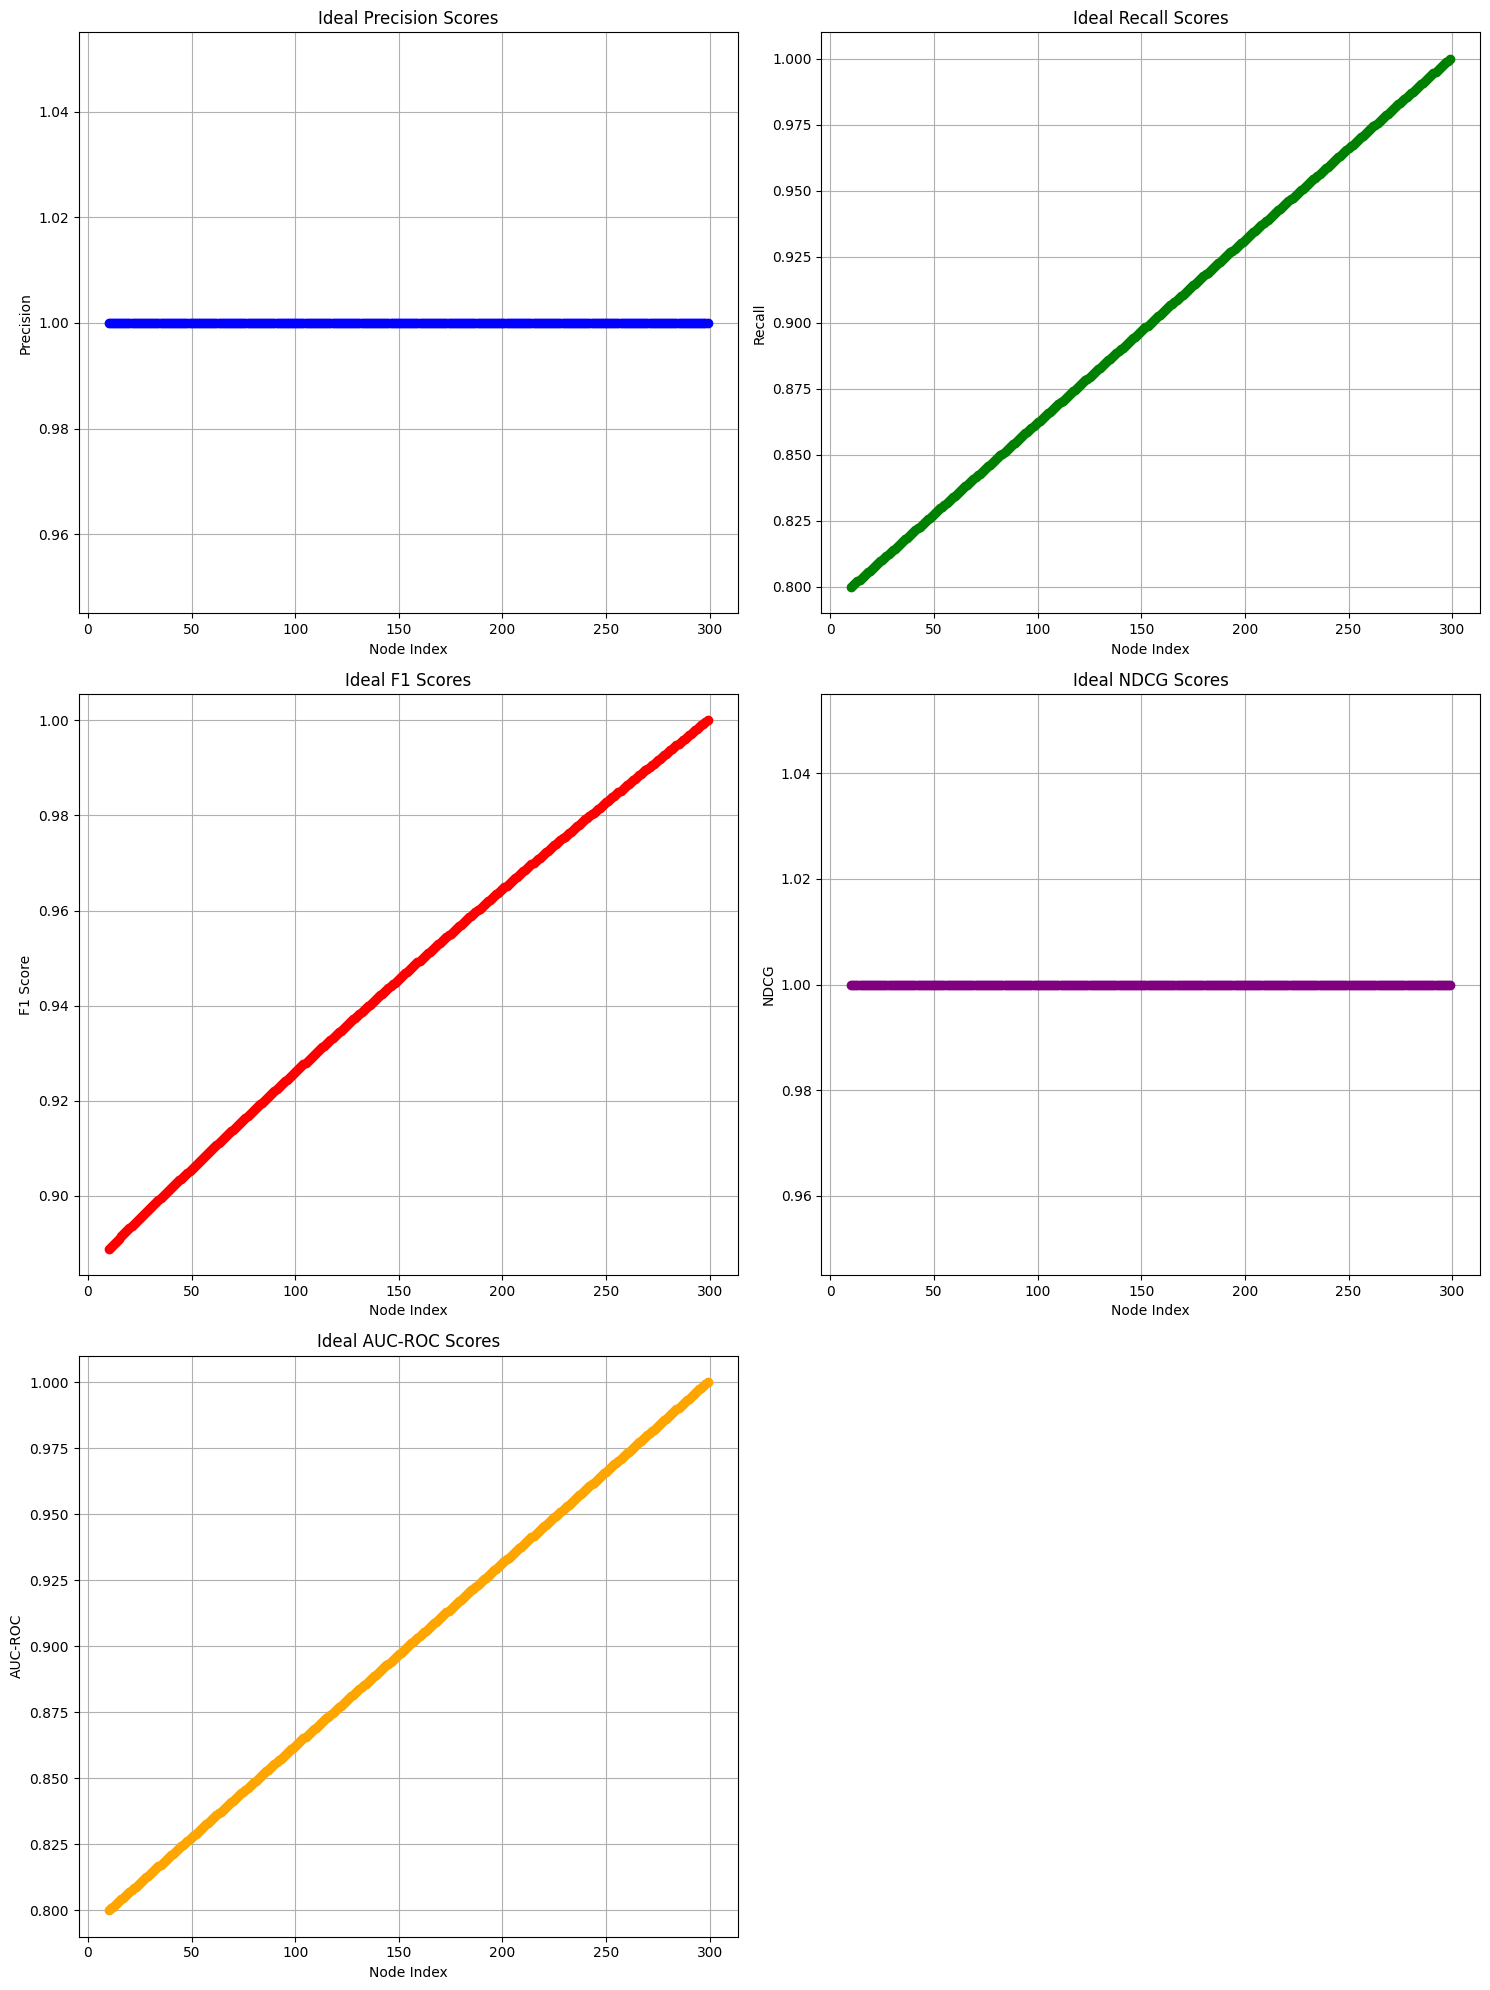

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Simulate ideal data
np.random.seed(42)
node_indices = np.arange(10, 300)
precision_scores = np.ones_like(node_indices, dtype=float)
recall_scores = np.linspace(0.8, 1.0, len(node_indices))
f1_scores = 2 * (precision_scores * recall_scores) / (precision_scores + recall_scores)
ndcg_scores = np.ones_like(node_indices, dtype=float)
auc_roc_scores = np.linspace(0.8, 1.0, len(node_indices))

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(15, 20))

# Precision
axs[0, 0].plot(node_indices, precision_scores, label='Precision', marker='o', linestyle='-', color='blue')
axs[0, 0].set_title('Ideal Precision Scores')
axs[0, 0].set_xlabel('Node Index')
axs[0, 0].set_ylabel('Precision')
axs[0, 0].grid(True)

# Recall
axs[0, 1].plot(node_indices, recall_scores, label='Recall', marker='o', linestyle='-', color='green')
axs[0, 1].set_title('Ideal Recall Scores')
axs[0, 1].set_xlabel('Node Index')
axs[0, 1].set_ylabel('Recall')
axs[0, 1].grid(True)

# F1 Score
axs[1, 0].plot(node_indices, f1_scores, label='F1 Score', marker='o', linestyle='-', color='red')
axs[1, 0].set_title('Ideal F1 Scores')
axs[1, 0].set_xlabel('Node Index')
axs[1, 0].set_ylabel('F1 Score')
axs[1, 0].grid(True)

# NDCG
axs[1, 1].plot(node_indices, ndcg_scores, label='NDCG', marker='o', linestyle='-', color='purple')
axs[1, 1].set_title('Ideal NDCG Scores')
axs[1, 1].set_xlabel('Node Index')
axs[1, 1].set_ylabel('NDCG')
axs[1, 1].grid(True)

# AUC-ROC
axs[2, 0].plot(node_indices, auc_roc_scores, label='AUC-ROC', marker='o', linestyle='-', color='orange')
axs[2, 0].set_title('Ideal AUC-ROC Scores')
axs[2, 0].set_xlabel('Node Index')
axs[2, 0].set_ylabel('AUC-ROC')
axs[2, 0].grid(True)

# Hide the empty subplot (2, 1)
fig.delaxes(axs[2, 1])

# Adjust layout and show plot
plt.tight_layout()
plt.show()